<a href="https://colab.research.google.com/github/Hariharapanda-Deepak/Hotel_booking_Analysis/blob/main/regression_Transportation_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [753]:
#importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math
from datetime import datetime
import calendar
import scipy.stats as stat
import pylab

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [754]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [755]:
# Importing Data
path='/content/drive/MyDrive/regression project/'
df=pd.read_csv(path + 'train_revised.csv')

In [756]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0         1442         15A          Mpesa      UZUEHCBUSO    17-10-17   
1         5437         14A          Mpesa      TIHLBUSGTE    19-11-17   
2         5710          8B          Mpesa      EQX8Q5G19O    26-11-17   
3         5777         19A          Mpesa      SGP18CL0ME    27-11-17   
4         5778         11A          Mpesa      BM97HFRGL9    27-11-17   
...        ...         ...            ...             ...         ...   
51640    13826          9B          Mpesa      8V2XDDZR6V    20-04-18   
51641    13809         18A          Mpesa      4PEBSVJSNK    20-04-18   
51642    13809         17A          Mpesa      LVN64LZDNN    20-04-18   
51643    13796         16B          Mpesa      REYBSKTYWN    20-04-18   
51644    14304           7          Mpesa      AQN7FBUSGP    14-11-17   

      travel_time travel_from travel_to car_type  max_capacity  
0            7:15      Migori   Nairobi      Bus            49  
1            7:12      Migori   Nairobi      Bus            49  
2            7:05      Keroka   Nairobi      Bus            49  
3            7:10    Homa Bay   Nairobi      Bus            49  
4            7:12      Migori   Nairobi      Bus            49  
...           ...         ...       ...      ...           ...  
51640        8:00      Awendo   Nairobi      Bus            49  
51641        8:00      Migori   Nairobi      Bus            49  
51642        8:00      Migori   Nairobi      Bus            49  
51643        7:08      Awendo   Nairobi      Bus            49  
51644        5:10       Kisii   Nairobi      Bus            49  

[51645 rows x 10 columns]

In [757]:
data_df=df.copy()

# Exploratory Data Analysis

In [758]:
df.shape

(51645, 10)

In [759]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [761]:
# Checking for duplicates
duplicate_rows=df[df.duplicated()]

In [762]:
duplicate_rows

Empty DataFrame
Columns: [ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity]
Index: []

In [763]:
# Checking null values
df.isna().sum().sort_values(ascending=False)

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [764]:
df.describe(include='object')

seat_number payment_method payment_receipt travel_date travel_time  \
count        51645          51645           51645       51645       51645   
unique          61              2           51645         149          78   
top              1          Mpesa      UZUEHCBUSO    10-12-17        7:09   
freq          2065          51532               1         856        3926   

       travel_from travel_to car_type  
count        51645     51645    51645  
unique          17         1        2  
top          Kisii   Nairobi      Bus  
freq         22607     51645    31985

In [765]:
df.describe()

ride_id  max_capacity
count  51645.000000  51645.000000
mean   10188.645793     34.534321
std     2211.295708     18.451193
min     1442.000000     11.000000
25%     8287.000000     11.000000
50%    10353.000000     49.000000
75%    12029.000000     49.000000
max    20117.000000     49.000000

# Prefered Car Type

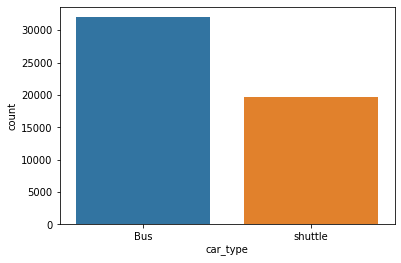

In [766]:
sns.countplot(df['car_type'])
plt.show()

# Preffered Capacity of Vehicle

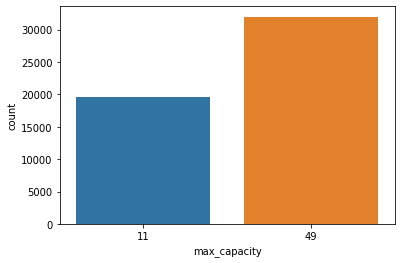

In [767]:
sns.countplot(df['max_capacity'])
plt.show()

# Creating Column for Target variable ("number of ticket") 

In [768]:
Ticket_df=df.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
Ticket_df.head()

ride_id  number_of_ticket
0     1442                 1
1     5437                 1
2     5710                 1
3     5777                 5
4     5778                31

In [769]:
df=df.drop_duplicates("ride_id")

In [770]:
df=df.merge(Ticket_df, how="left",on="ride_id")
df.head()

ride_id seat_number payment_method payment_receipt travel_date travel_time  \
0     1442         15A          Mpesa      UZUEHCBUSO    17-10-17        7:15   
1     5437         14A          Mpesa      TIHLBUSGTE    19-11-17        7:12   
2     5710          8B          Mpesa      EQX8Q5G19O    26-11-17        7:05   
3     5777         19A          Mpesa      SGP18CL0ME    27-11-17        7:10   
4     5778         11A          Mpesa      BM97HFRGL9    27-11-17        7:12   

  travel_from travel_to car_type  max_capacity  number_of_ticket  
0      Migori   Nairobi      Bus            49                 1  
1      Migori   Nairobi      Bus            49                 1  
2      Keroka   Nairobi      Bus            49                 1  
3    Homa Bay   Nairobi      Bus            49                 5  
4      Migori   Nairobi      Bus            49                31

In [771]:
df.shape

(6249, 11)

# Most preffered Travel Time

In [772]:
traveled_time_counts=df.groupby('travel_time')['number_of_ticket'].count()

In [773]:
traveled_time_counts

travel_time
10:00    67
10:10    60
10:20    64
10:30    56
10:40    56
         ..
9:10     86
9:20     84
9:30     81
9:40     77
9:50     78
Name: number_of_ticket, Length: 78, dtype: int64

In [774]:
traveled_time_counts=traveled_time_counts.sort_index(ascending=True)

In [775]:
traveled_time_counts

travel_time
10:00    67
10:10    60
10:20    64
10:30    56
10:40    56
         ..
9:10     86
9:20     84
9:30     81
9:40     77
9:50     78
Name: number_of_ticket, Length: 78, dtype: int64

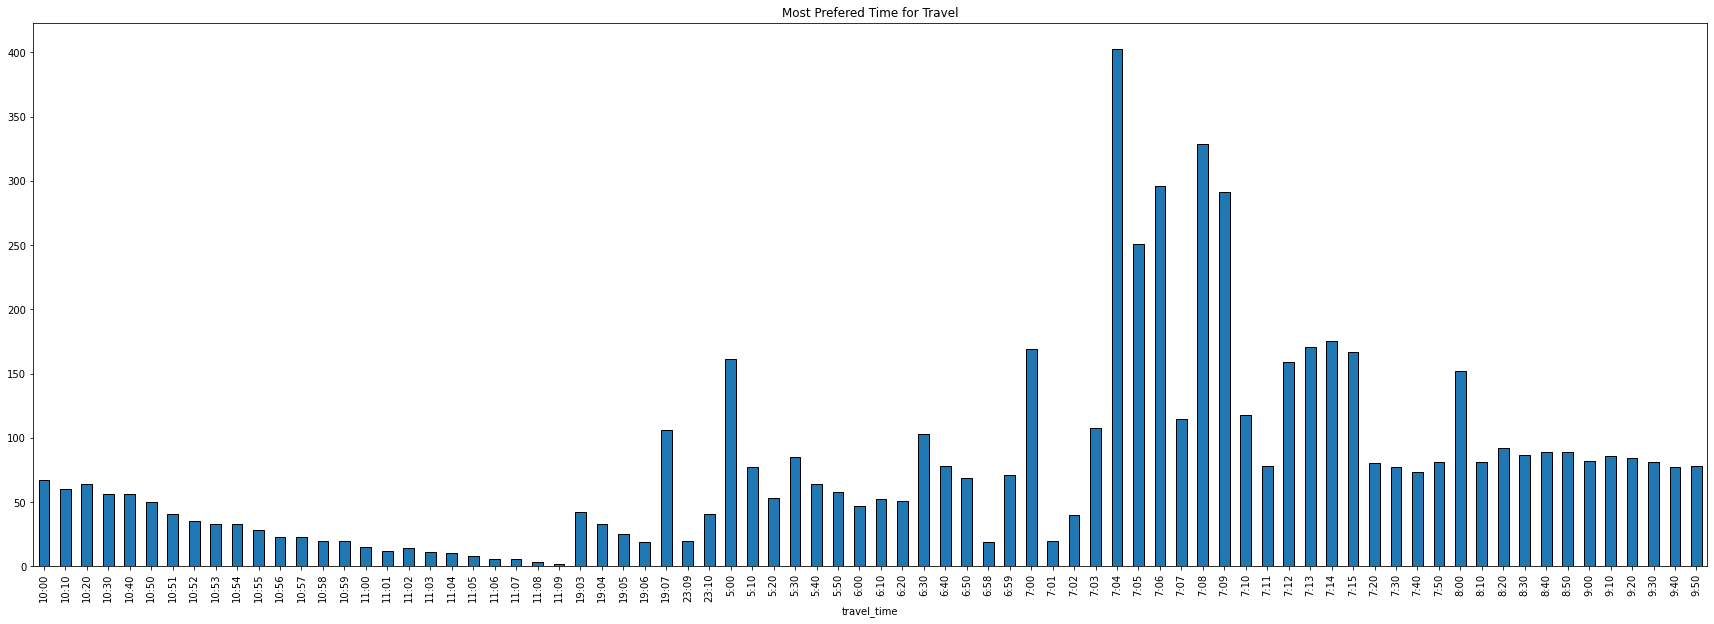

In [776]:
traveled_time_counts.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(30,10),title='Most Prefered Time for Travel')

# Trend of Booking

In [777]:
df['travel_date']=pd.to_datetime(df['travel_date'], format='%d-%m-%y')

In [778]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0        1442         15A          Mpesa      UZUEHCBUSO  2017-10-17   
1        5437         14A          Mpesa      TIHLBUSGTE  2017-11-19   
2        5710          8B          Mpesa      EQX8Q5G19O  2017-11-26   
3        5777         19A          Mpesa      SGP18CL0ME  2017-11-27   
4        5778         11A          Mpesa      BM97HFRGL9  2017-11-27   
...       ...         ...            ...             ...         ...   
6244    13812          2B          Mpesa      FSAA2XB4WX  2018-04-20   
6245    13813         14B          Mpesa      TSOPCEGOKH  2018-04-20   
6246    13825         24A          Mpesa      B3R9XWCV9O  2018-04-20   
6247    13826          9B          Mpesa      8V2XDDZR6V  2018-04-20   
6248    14304           7          Mpesa      AQN7FBUSGP  2017-11-14   

     travel_time travel_from travel_to car_type  max_capacity  \
0           7:15      Migori   Nairobi      Bus            49   
1           7:12      Migori   Nairobi      Bus            49   
2           7:05      Keroka   Nairobi      Bus            49   
3           7:10    Homa Bay   Nairobi      Bus            49   
4           7:12      Migori   Nairobi      Bus            49   
...          ...         ...       ...      ...           ...   
6244       23:10      Ndhiwa   Nairobi      Bus            49   
6245        7:05      Ndhiwa   Nairobi      Bus            49   
6246        7:09       Rongo   Nairobi      Bus            49   
6247        8:00      Awendo   Nairobi      Bus            49   
6248        5:10       Kisii   Nairobi      Bus            49   

      number_of_ticket  
0                    1  
1                    1  
2                    1  
3                    5  
4                   31  
...                ...  
6244                11  
6245                11  
6246                 1  
6247                 1  
6248                 1  

[6249 rows x 11 columns]

In [779]:
df['year']=df['travel_date'].dt.year
df['month']=df['travel_date'].dt.month
df['day']=df['travel_date'].dt.day

df['weekday']=df['travel_date'].dt.day_name()

In [780]:

df['travel_date']=pd.to_datetime(df['travel_date'])


In [781]:
traveled_date_counts=df.groupby('travel_date')['number_of_ticket'].count()

In [782]:
traveled_date_counts

travel_date
2017-10-17     1
2017-11-14     1
2017-11-19     1
2017-11-26     1
2017-11-27    47
              ..
2018-04-16    50
2018-04-17    45
2018-04-18    45
2018-04-19    42
2018-04-20    41
Name: number_of_ticket, Length: 149, dtype: int64

In [783]:
b=dict(traveled_date_counts)

In [784]:
x=list(b.keys())
y=list(b.values())

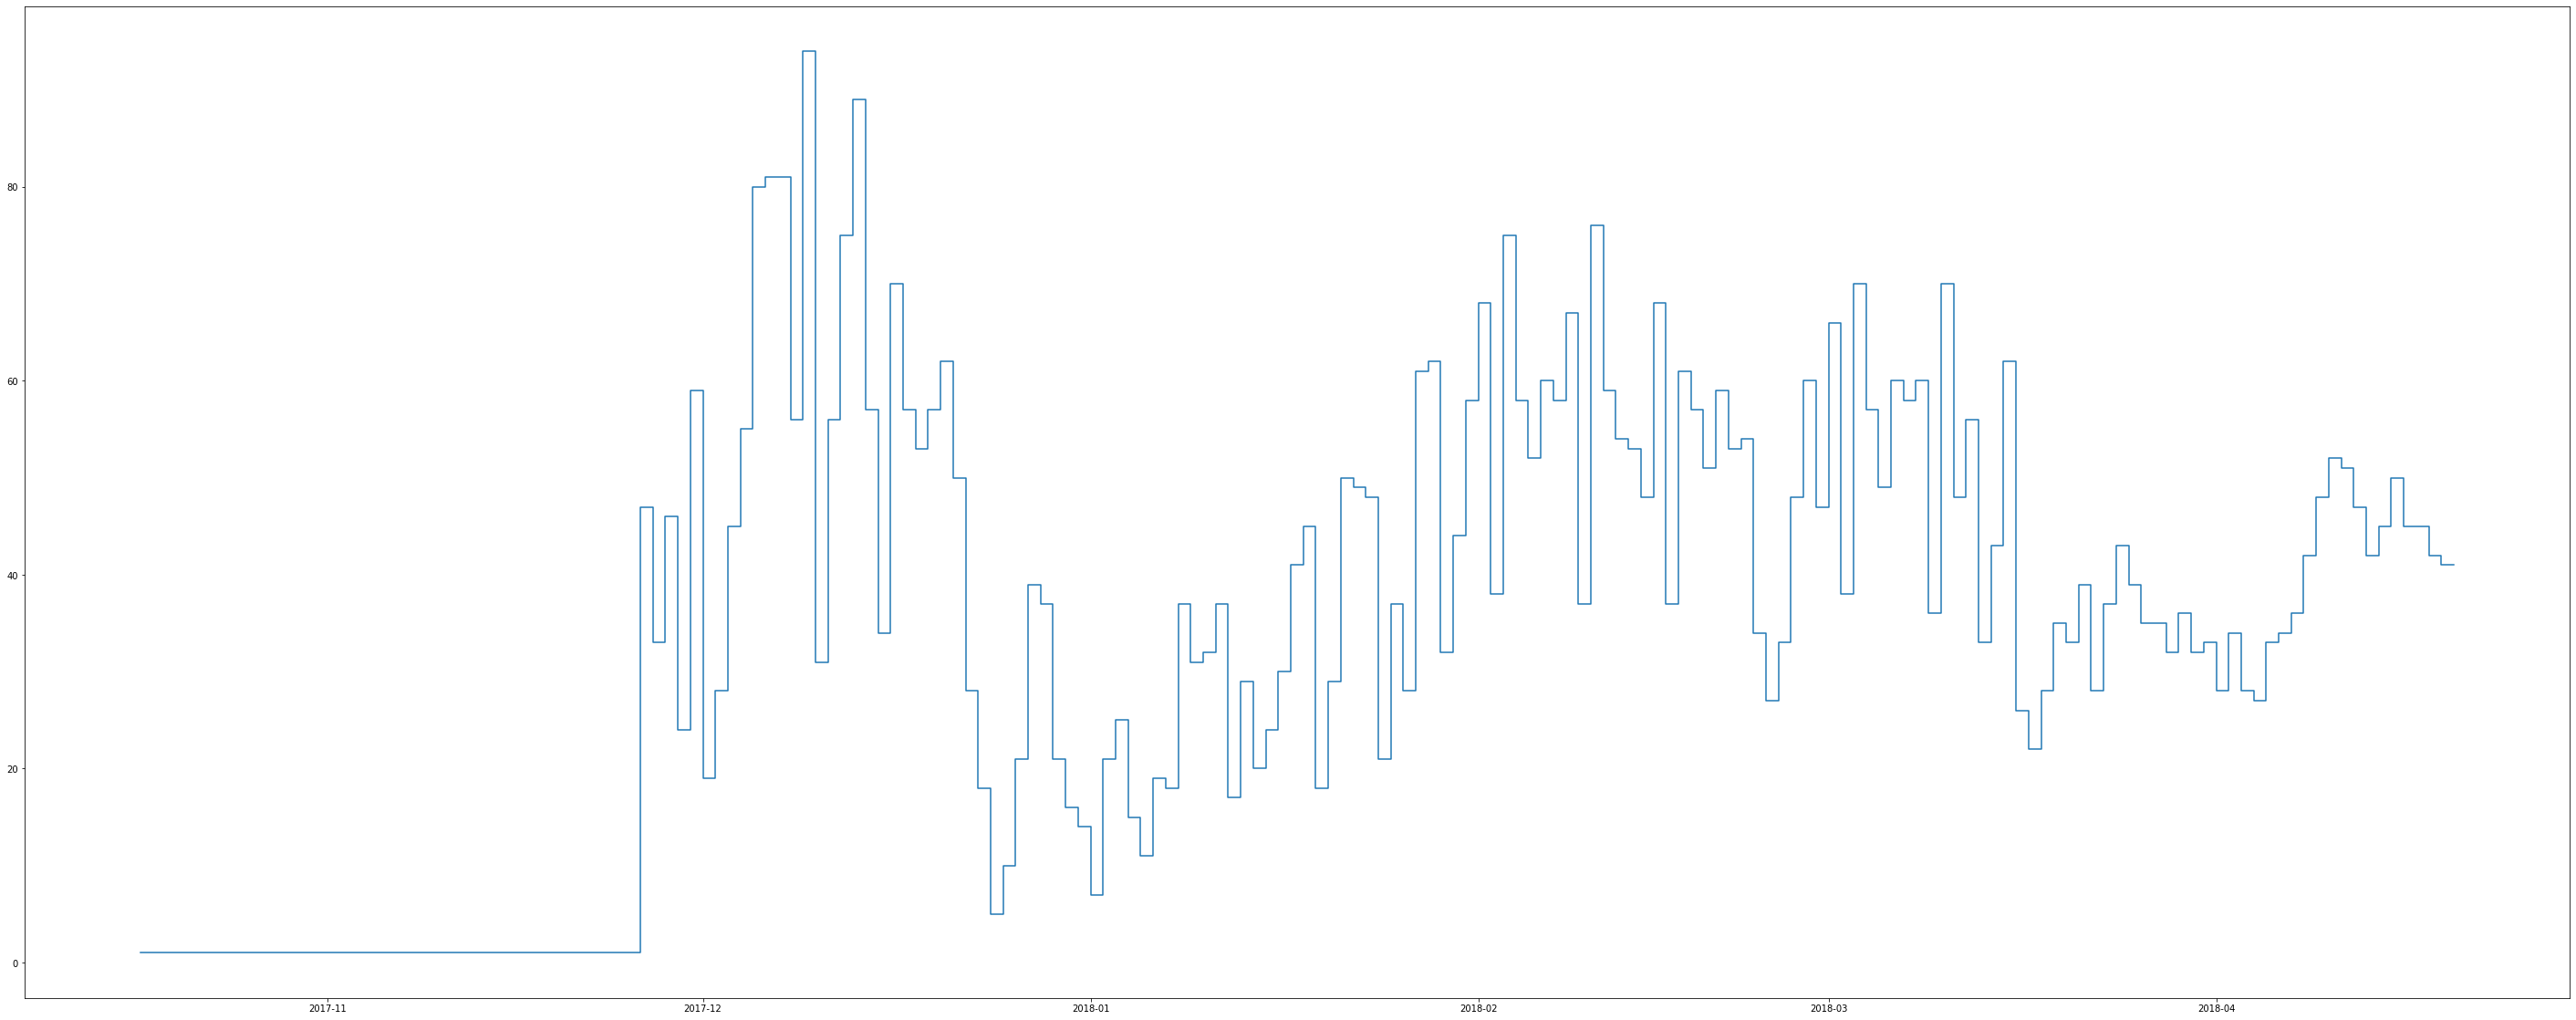

In [785]:
plt.figure(figsize=(50,20))
plt.step(x,y)
plt.show()
#traveled_date_counts.plot(kind='bar',edgecolor='black',linewidth=1,figsize=(50,10),title='Most Prefered Time for Travel')


In [786]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0        1442         15A          Mpesa      UZUEHCBUSO  2017-10-17   
1        5437         14A          Mpesa      TIHLBUSGTE  2017-11-19   
2        5710          8B          Mpesa      EQX8Q5G19O  2017-11-26   
3        5777         19A          Mpesa      SGP18CL0ME  2017-11-27   
4        5778         11A          Mpesa      BM97HFRGL9  2017-11-27   
...       ...         ...            ...             ...         ...   
6244    13812          2B          Mpesa      FSAA2XB4WX  2018-04-20   
6245    13813         14B          Mpesa      TSOPCEGOKH  2018-04-20   
6246    13825         24A          Mpesa      B3R9XWCV9O  2018-04-20   
6247    13826          9B          Mpesa      8V2XDDZR6V  2018-04-20   
6248    14304           7          Mpesa      AQN7FBUSGP  2017-11-14   

     travel_time travel_from travel_to car_type  max_capacity  \
0           7:15      Migori   Nairobi      Bus            49   
1           7:12      Migori   Nairobi      Bus            49   
2           7:05      Keroka   Nairobi      Bus            49   
3           7:10    Homa Bay   Nairobi      Bus            49   
4           7:12      Migori   Nairobi      Bus            49   
...          ...         ...       ...      ...           ...   
6244       23:10      Ndhiwa   Nairobi      Bus            49   
6245        7:05      Ndhiwa   Nairobi      Bus            49   
6246        7:09       Rongo   Nairobi      Bus            49   
6247        8:00      Awendo   Nairobi      Bus            49   
6248        5:10       Kisii   Nairobi      Bus            49   

      number_of_ticket  year  month  day  weekday  
0                    1  2017     10   17  Tuesday  
1                    1  2017     11   19   Sunday  
2                    1  2017     11   26   Sunday  
3                    5  2017     11   27   Monday  
4                   31  2017     11   27   Monday  
...                ...   ...    ...  ...      ...  
6244                11  2018      4   20   Friday  
6245                11  2018      4   20   Friday  
6246                 1  2018      4   20   Friday  
6247                 1  2018      4   20   Friday  
6248                 1  2017     11   14  Tuesday  

[6249 rows x 15 columns]

# Weekday Booking Analysis

In [787]:
weekday_count=df.groupby('weekday')['number_of_ticket'].count()

In [788]:
weekday_count

weekday
Friday       1048
Monday        848
Saturday      623
Sunday        924
Thursday      970
Tuesday       865
Wednesday     971
Name: number_of_ticket, dtype: int64

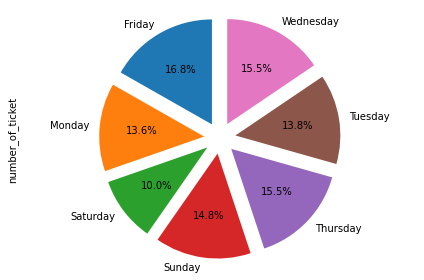

In [789]:
weekday_count.plot.pie(y=df.index,
           shadow=False,
           explode=(0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

# Month wise booking Analysis

In [790]:
df['Month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [791]:
month_count=df.groupby('Month')['number_of_ticket'].count()

In [792]:
month_count=dict(month_count)

In [793]:
x=month_count.keys()
x=list(x)
y=month_count.values()
y=list(y)

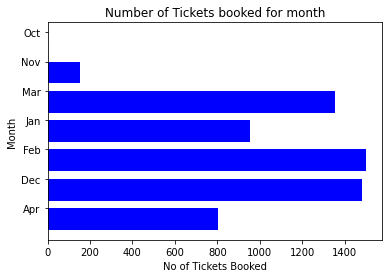

In [794]:
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Number of Tickets booked for month')
plt.xlabel('No of Tickets Booked')
plt.ylabel('Month')      
plt.show()

Booking from location Analysis

In [795]:
travel_starting=df.groupby('travel_from')['number_of_ticket'].count()

In [796]:
travel_starting

travel_from
Awendo        185
Homa Bay      356
Kehancha      172
Kendu Bay       1
Keroka        312
Keumbu         20
Kijauri       556
Kisii        3020
Mbita          21
Migori        386
Ndhiwa         22
Nyachenge     196
Oyugis          2
Rodi           51
Rongo         738
Sirare        191
Sori           20
Name: number_of_ticket, dtype: int64

In [797]:
v=dict(travel_starting)
x=v.keys()
x=list(x)
y=v.values()
y=list(y)

<StemContainer object of 3 artists>

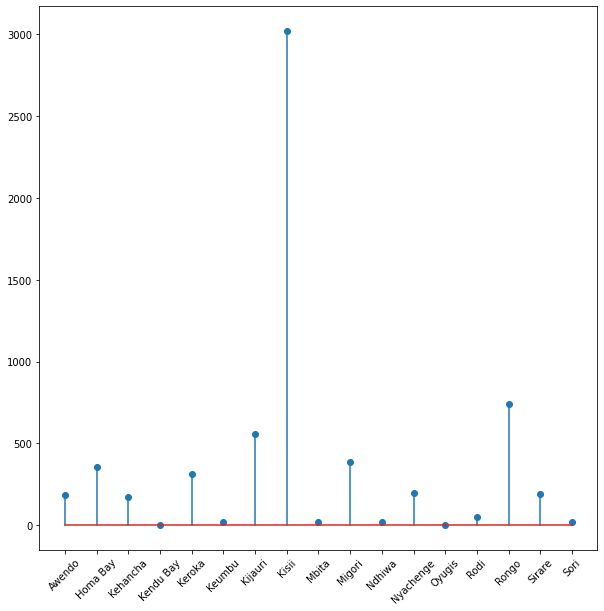

In [798]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=45)
plt.stem(x,y)

Payment Method Analysis

In [799]:
paymentmethod=df.groupby('payment_method')['number_of_ticket'].count()

In [800]:
paymentmethod

payment_method
Cash       38
Mpesa    6211
Name: number_of_ticket, dtype: int64

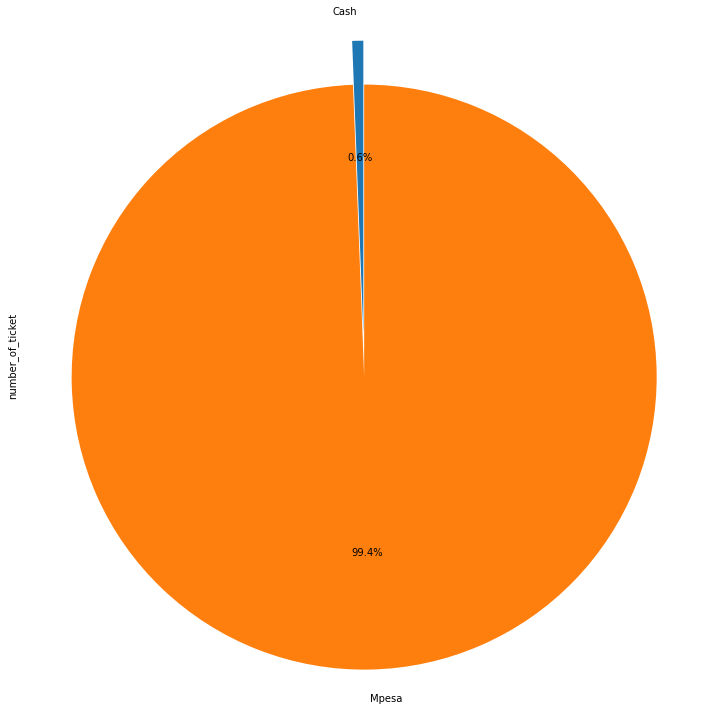

In [801]:
plt.figure(figsize=(10,10))
paymentmethod.plot.pie(y=df.index,
           shadow=False,
           explode=(0, 0.15),   # exploding 'Friday'
           startangle=90,
           autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [802]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0        1442         15A          Mpesa      UZUEHCBUSO  2017-10-17   
1        5437         14A          Mpesa      TIHLBUSGTE  2017-11-19   
2        5710          8B          Mpesa      EQX8Q5G19O  2017-11-26   
3        5777         19A          Mpesa      SGP18CL0ME  2017-11-27   
4        5778         11A          Mpesa      BM97HFRGL9  2017-11-27   
...       ...         ...            ...             ...         ...   
6244    13812          2B          Mpesa      FSAA2XB4WX  2018-04-20   
6245    13813         14B          Mpesa      TSOPCEGOKH  2018-04-20   
6246    13825         24A          Mpesa      B3R9XWCV9O  2018-04-20   
6247    13826          9B          Mpesa      8V2XDDZR6V  2018-04-20   
6248    14304           7          Mpesa      AQN7FBUSGP  2017-11-14   

     travel_time travel_from travel_to car_type  max_capacity  \
0           7:15      Migori   Nairobi      Bus            49   
1           7:12      Migori   Nairobi      Bus            49   
2           7:05      Keroka   Nairobi      Bus            49   
3           7:10    Homa Bay   Nairobi      Bus            49   
4           7:12      Migori   Nairobi      Bus            49   
...          ...         ...       ...      ...           ...   
6244       23:10      Ndhiwa   Nairobi      Bus            49   
6245        7:05      Ndhiwa   Nairobi      Bus            49   
6246        7:09       Rongo   Nairobi      Bus            49   
6247        8:00      Awendo   Nairobi      Bus            49   
6248        5:10       Kisii   Nairobi      Bus            49   

      number_of_ticket  year  month  day  weekday Month  
0                    1  2017     10   17  Tuesday   Oct  
1                    1  2017     11   19   Sunday   Nov  
2                    1  2017     11   26   Sunday   Nov  
3                    5  2017     11   27   Monday   Nov  
4                   31  2017     11   27   Monday   Nov  
...                ...   ...    ...  ...      ...   ...  
6244                11  2018      4   20   Friday   Apr  
6245                11  2018      4   20   Friday   Apr  
6246                 1  2018      4   20   Friday   Apr  
6247                 1  2018      4   20   Friday   Apr  
6248                 1  2017     11   14  Tuesday   Nov  

[6249 rows x 16 columns]

In [803]:
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
df["travel_from_distance"]=df.travel_from.map(distance)

In [804]:
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df["travel_from_time"]=df.travel_from.map(time)

In [805]:
df["Speed"]=df.travel_from_time/df.travel_from_distance

In [806]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0        1442         15A          Mpesa      UZUEHCBUSO  2017-10-17   
1        5437         14A          Mpesa      TIHLBUSGTE  2017-11-19   
2        5710          8B          Mpesa      EQX8Q5G19O  2017-11-26   
3        5777         19A          Mpesa      SGP18CL0ME  2017-11-27   
4        5778         11A          Mpesa      BM97HFRGL9  2017-11-27   
...       ...         ...            ...             ...         ...   
6244    13812          2B          Mpesa      FSAA2XB4WX  2018-04-20   
6245    13813         14B          Mpesa      TSOPCEGOKH  2018-04-20   
6246    13825         24A          Mpesa      B3R9XWCV9O  2018-04-20   
6247    13826          9B          Mpesa      8V2XDDZR6V  2018-04-20   
6248    14304           7          Mpesa      AQN7FBUSGP  2017-11-14   

     travel_time travel_from travel_to car_type  max_capacity  \
0           7:15      Migori   Nairobi      Bus            49   
1           7:12      Migori   Nairobi      Bus            49   
2           7:05      Keroka   Nairobi      Bus            49   
3           7:10    Homa Bay   Nairobi      Bus            49   
4           7:12      Migori   Nairobi      Bus            49   
...          ...         ...       ...      ...           ...   
6244       23:10      Ndhiwa   Nairobi      Bus            49   
6245        7:05      Ndhiwa   Nairobi      Bus            49   
6246        7:09       Rongo   Nairobi      Bus            49   
6247        8:00      Awendo   Nairobi      Bus            49   
6248        5:10       Kisii   Nairobi      Bus            49   

      number_of_ticket  year  month  day  weekday Month  travel_from_distance  \
0                    1  2017     10   17  Tuesday   Oct                 370.0   
1                    1  2017     11   19   Sunday   Nov                 370.0   
2                    1  2017     11   26   Sunday   Nov                 280.0   
3                    5  2017     11   27   Monday   Nov                 360.0   
4                   31  2017     11   27   Monday   Nov                 370.0   
...                ...   ...    ...  ...      ...   ...                   ...   
6244                11  2018      4   20   Friday   Apr                 371.0   
6245                11  2018      4   20   Friday   Apr                 371.0   
6246                 1  2018      4   20   Friday   Apr                 332.0   
6247                 1  2018      4   20   Friday   Apr                 351.0   
6248                 1  2017     11   14  Tuesday   Nov                 305.1   

      travel_from_time     Speed  
0                  428  1.156757  
1                  428  1.156757  
2                  300  1.071429  
3                  420  1.166667  
4                  428  1.156757  
...                ...       ...  
6244               420  1.132075  
6245               420  1.132075  
6246               381  1.147590  
6247               398  1.133903  
6248               334  1.094723  

[6249 rows x 19 columns]

In [807]:
from sklearn import preprocessing #Import LabelEncoder
df = pd.get_dummies(df, columns=['travel_from','Month','weekday'])
label_enc = {'Bus':1,'shuttle':0}
df.replace(label_enc,inplace=True)

In [808]:
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [809]:
df

ride_id seat_number payment_method payment_receipt travel_date  \
0        1442         15A          Mpesa      UZUEHCBUSO  2017-10-17   
1        5437         14A          Mpesa      TIHLBUSGTE  2017-11-19   
2        5710          8B          Mpesa      EQX8Q5G19O  2017-11-26   
3        5777         19A          Mpesa      SGP18CL0ME  2017-11-27   
4        5778         11A          Mpesa      BM97HFRGL9  2017-11-27   
...       ...         ...            ...             ...         ...   
6244    13812          2B          Mpesa      FSAA2XB4WX  2018-04-20   
6245    13813         14B          Mpesa      TSOPCEGOKH  2018-04-20   
6246    13825         24A          Mpesa      B3R9XWCV9O  2018-04-20   
6247    13826          9B          Mpesa      8V2XDDZR6V  2018-04-20   
6248    14304           7          Mpesa      AQN7FBUSGP  2017-11-14   

      travel_time travel_to  car_type  max_capacity  number_of_ticket  ...  \
0             435   Nairobi         1            49                 1  ...   
1             432   Nairobi         1            49                 1  ...   
2             425   Nairobi         1            49                 1  ...   
3             430   Nairobi         1            49                 5  ...   
4             432   Nairobi         1            49                31  ...   
...           ...       ...       ...           ...               ...  ...   
6244         1390   Nairobi         1            49                11  ...   
6245          425   Nairobi         1            49                11  ...   
6246          429   Nairobi         1            49                 1  ...   
6247          480   Nairobi         1            49                 1  ...   
6248          310   Nairobi         1            49                 1  ...   

      Month_Mar  Month_Nov  Month_Oct  weekday_Friday  weekday_Monday  \
0             0          0          1               0               0   
1             0          1          0               0               0   
2             0          1          0               0               0   
3             0          1          0               0               1   
4             0          1          0               0               1   
...         ...        ...        ...             ...             ...   
6244          0          0          0               1               0   
6245          0          0          0               1               0   
6246          0          0          0               1               0   
6247          0          0          0               1               0   
6248          0          1          0               0               0   

      weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                    0               0                 0                1   
1                    0               1                 0                0   
2                    0               1                 0                0   
3                    0               0                 0                0   
4                    0               0                 0                0   
...                ...             ...               ...              ...   
6244                 0               0                 0                0   
6245                 0               0                 0                0   
6246                 0               0                 0                0   
6247                 0               0                 0                0   
6248                 0               0                 0                1   

      weekday_Wednesday  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6244                  0  
6245                  0  
6246                  0  
6247                  0  
6248                  0  

[6249 rows x 47 columns]

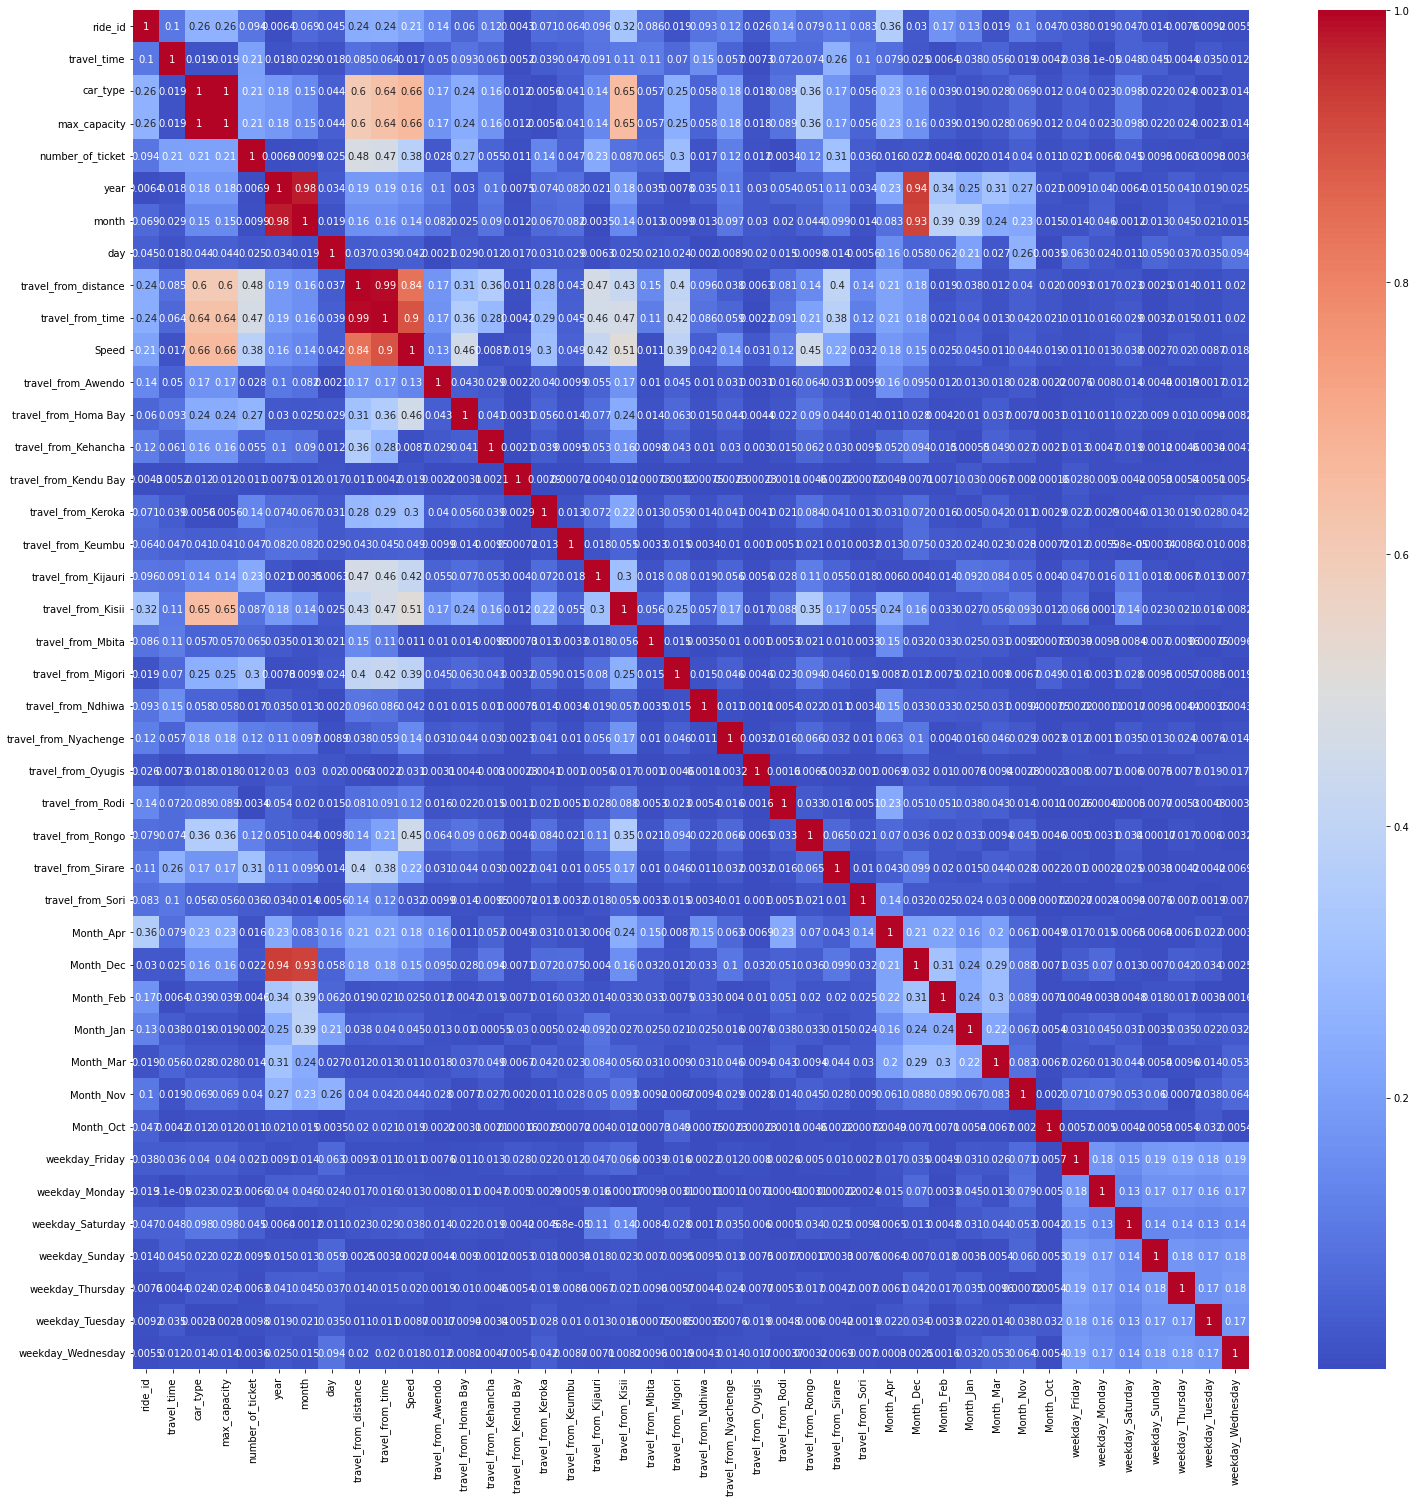

In [810]:
## Correlation
plt.figure(figsize=(25,25))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [811]:
df.drop(['travel_to','ride_id','car_type','year','payment_receipt'], axis=1, inplace=True)

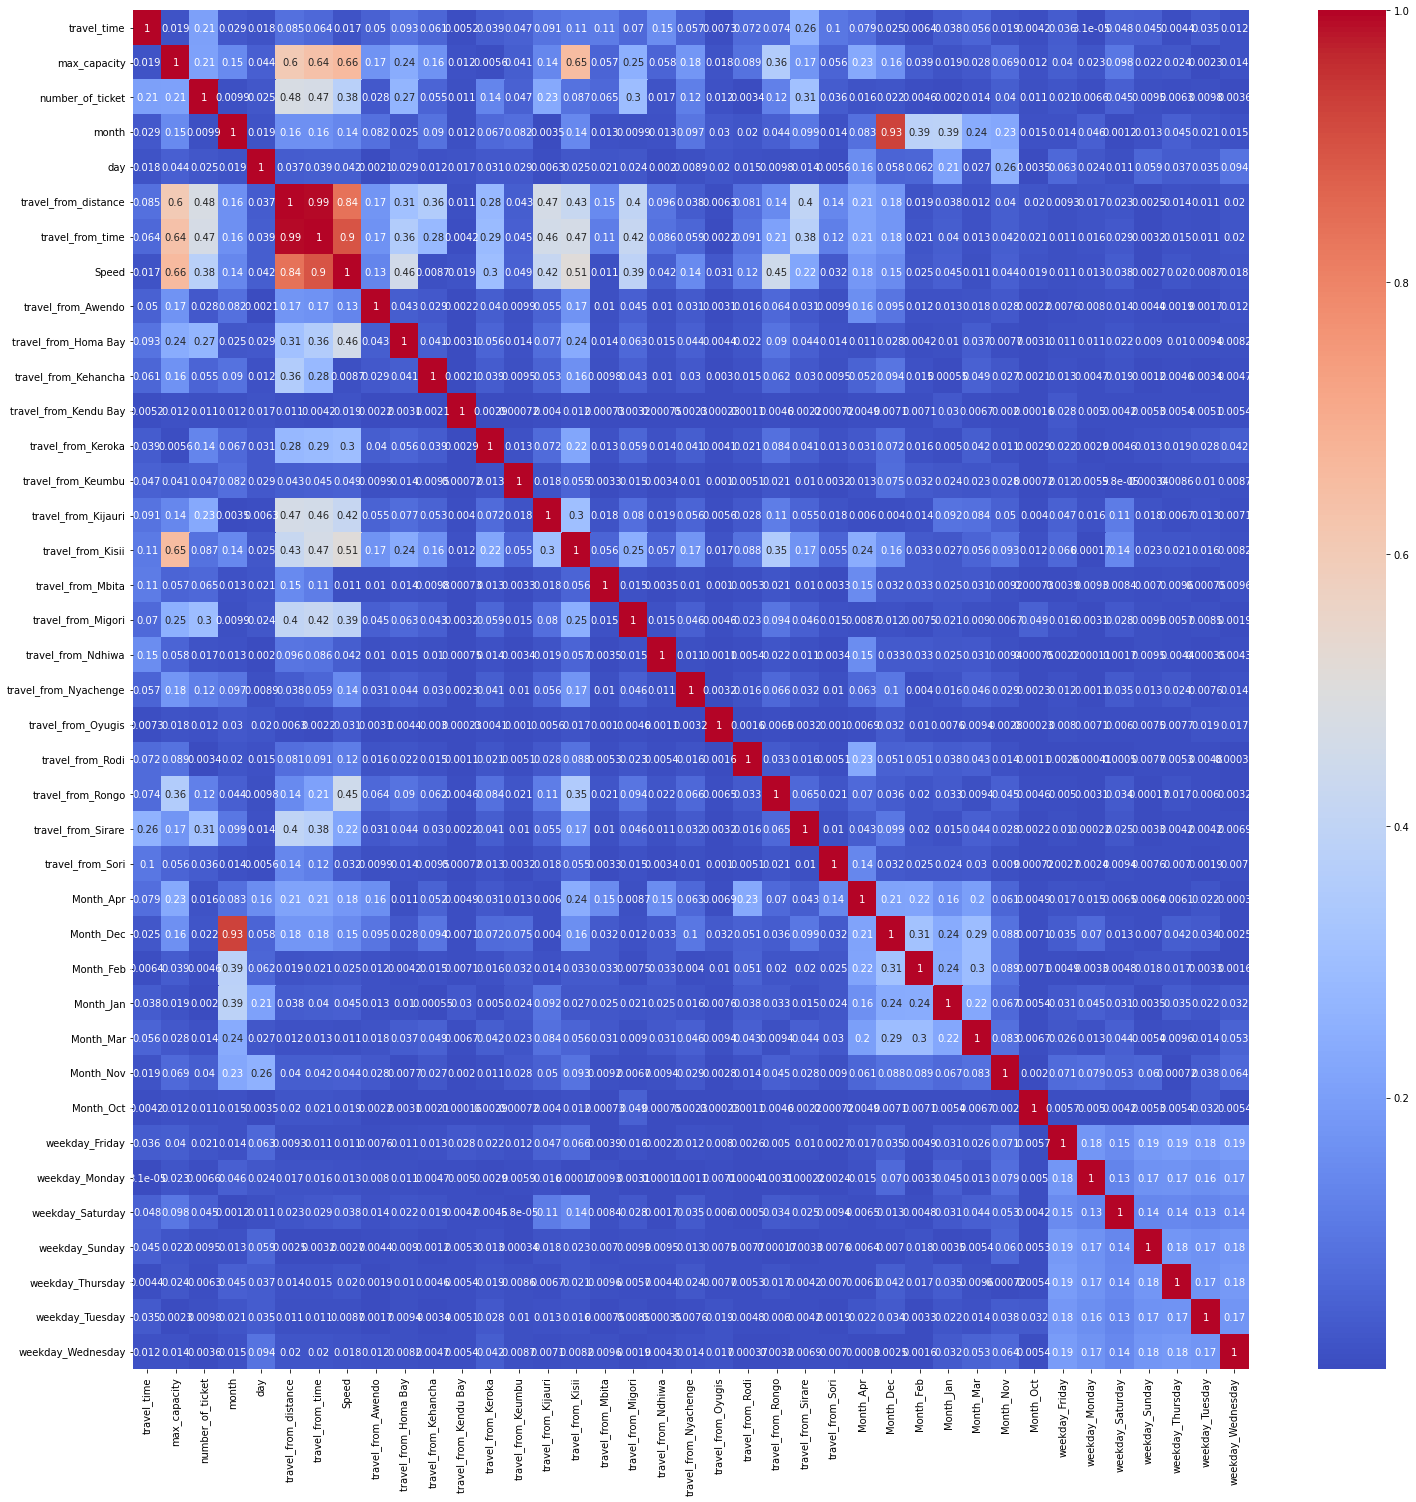

In [812]:
## Correlation
plt.figure(figsize=(25,25))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [813]:
numeric_features = df.describe().columns
numeric_features

Index(['travel_time', 'max_capacity', 'number_of_ticket', 'month', 'day',
       'travel_from_distance', 'travel_from_time', 'Speed',
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
       'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu',
       'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita',
       'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
       'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo',
       'travel_from_Sirare', 'travel_from_Sori', 'Month_Apr', 'Month_Dec',
       'Month_Feb', 'Month_Jan', 'Month_Mar', 'Month_Nov', 'Month_Oct',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [814]:
data=df.copy()

In [815]:
data

seat_number payment_method travel_date  travel_time  max_capacity  \
0            15A          Mpesa  2017-10-17          435            49   
1            14A          Mpesa  2017-11-19          432            49   
2             8B          Mpesa  2017-11-26          425            49   
3            19A          Mpesa  2017-11-27          430            49   
4            11A          Mpesa  2017-11-27          432            49   
...          ...            ...         ...          ...           ...   
6244          2B          Mpesa  2018-04-20         1390            49   
6245         14B          Mpesa  2018-04-20          425            49   
6246         24A          Mpesa  2018-04-20          429            49   
6247          9B          Mpesa  2018-04-20          480            49   
6248           7          Mpesa  2017-11-14          310            49   

      number_of_ticket  month  day  travel_from_distance  travel_from_time  \
0                    1     10   17                 370.0               428   
1                    1     11   19                 370.0               428   
2                    1     11   26                 280.0               300   
3                    5     11   27                 360.0               420   
4                   31     11   27                 370.0               428   
...                ...    ...  ...                   ...               ...   
6244                11      4   20                 371.0               420   
6245                11      4   20                 371.0               420   
6246                 1      4   20                 332.0               381   
6247                 1      4   20                 351.0               398   
6248                 1     11   14                 305.1               334   

      ...  Month_Mar  Month_Nov  Month_Oct  weekday_Friday  weekday_Monday  \
0     ...          0          0          1               0               0   
1     ...          0          1          0               0               0   
2     ...          0          1          0               0               0   
3     ...          0          1          0               0               1   
4     ...          0          1          0               0               1   
...   ...        ...        ...        ...             ...             ...   
6244  ...          0          0          0               1               0   
6245  ...          0          0          0               1               0   
6246  ...          0          0          0               1               0   
6247  ...          0          0          0               1               0   
6248  ...          0          1          0               0               0   

      weekday_Saturday  weekday_Sunday  weekday_Thursday  weekday_Tuesday  \
0                    0               0                 0                1   
1                    0               1                 0                0   
2                    0               1                 0                0   
3                    0               0                 0                0   
4                    0               0                 0                0   
...                ...             ...               ...              ...   
6244                 0               0                 0                0   
6245                 0               0                 0                0   
6246                 0               0                 0                0   
6247                 0               0                 0                0   
6248                 0               0                 0                1   

      weekday_Wednesday  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6244                  0  
6245                  0  
6246                  0  
6247                  0  
6248                  0  

[624

In [816]:
def plot_data(data,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(data[feature],dist='norm',plot=pylab)
  plt.show()

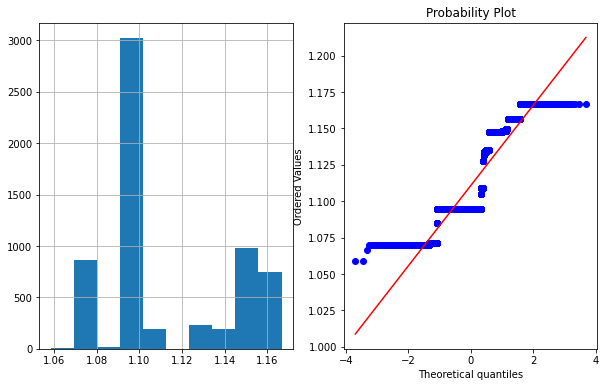

In [817]:
plot_data(data,'Speed')

In [818]:
data['xxx']=np.log10(data.Speed)

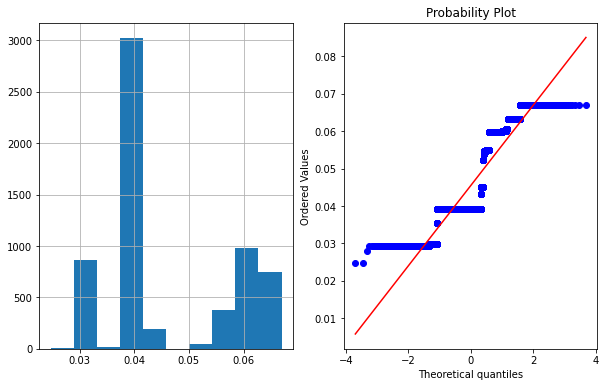

In [819]:
plot_data(data,'xxx')

In [820]:
#for col in numeric_features[1:]:
 #   fig = plt.figure(figsize=(9, 6))
  #  ax = fig.gca()
   # feature = (df[col])
    #feature.hist(bins=20, ax = ax)
    #ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
   # ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
   # ax.set_title(col)
# plt.show()

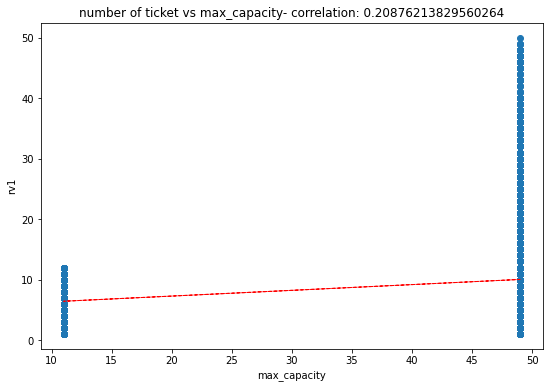

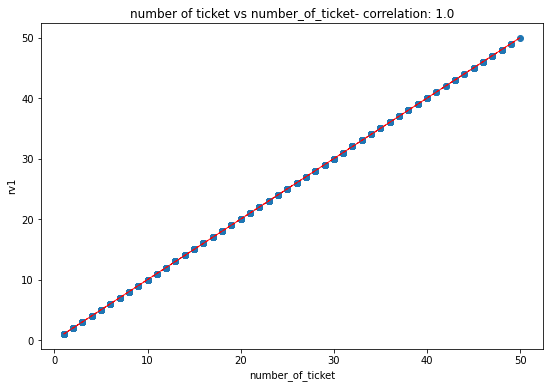

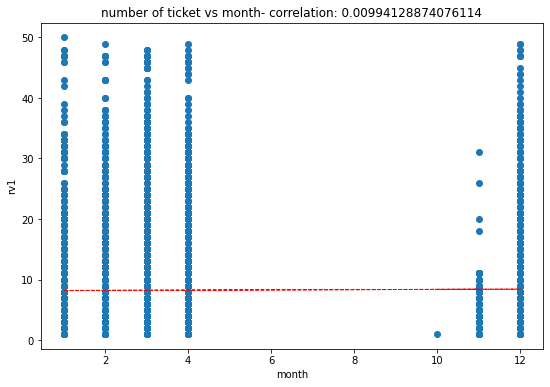

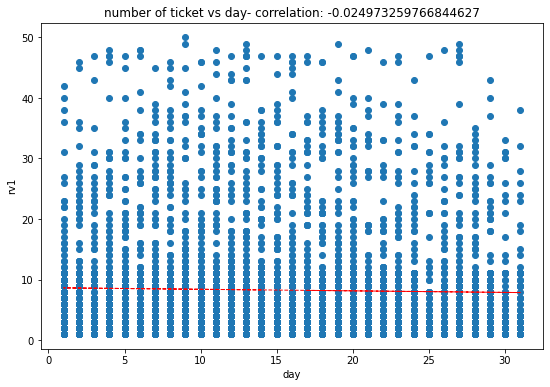

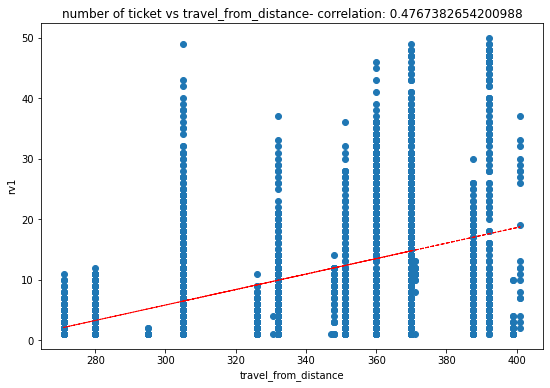

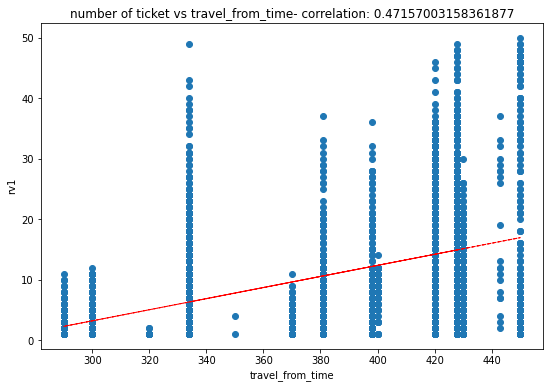

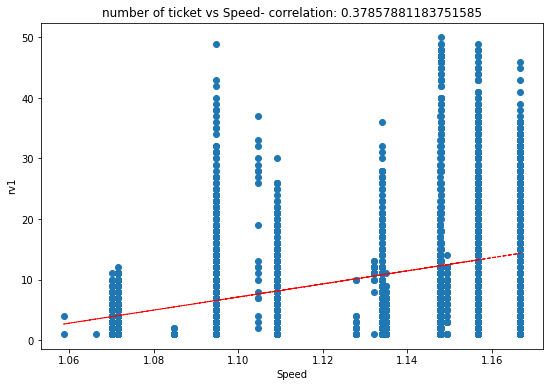

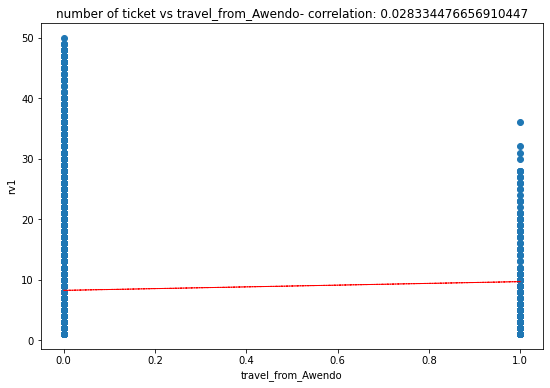

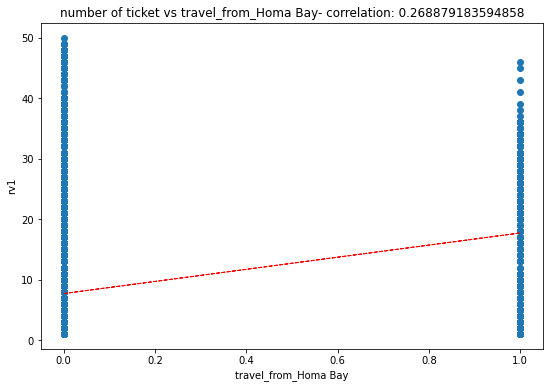

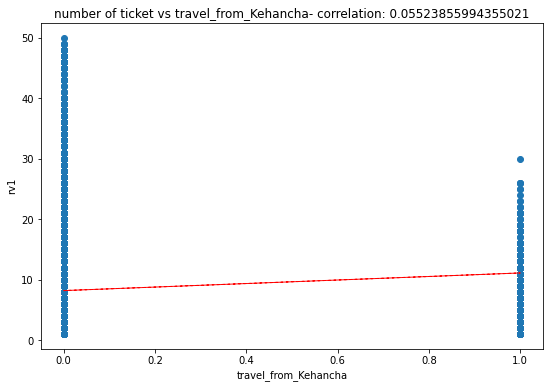

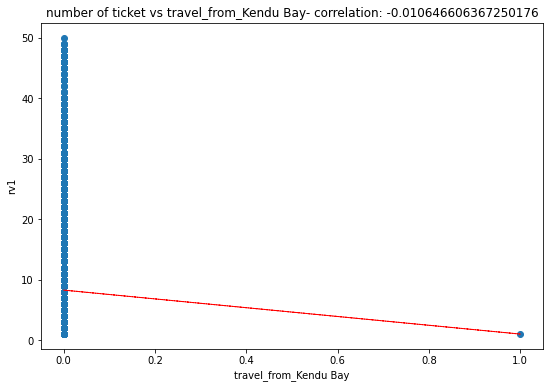

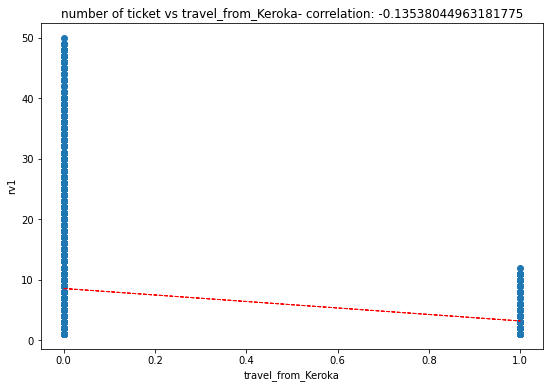

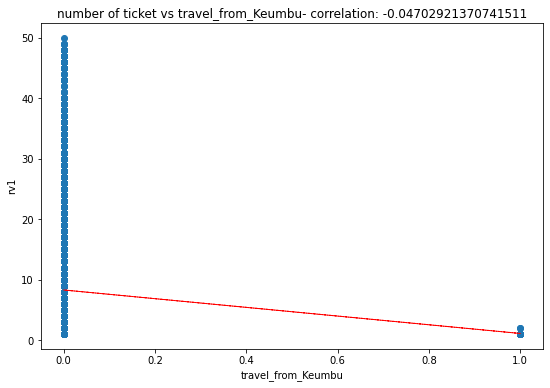

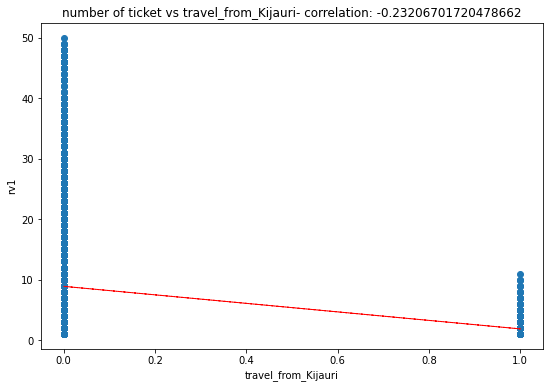

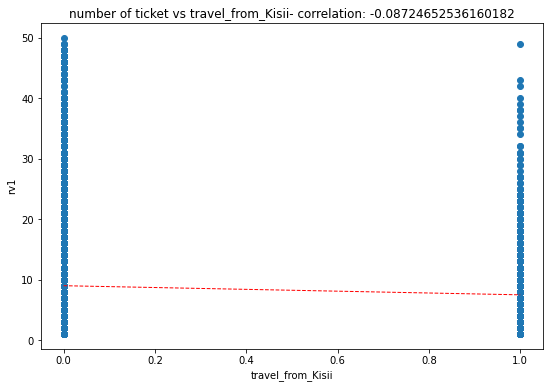

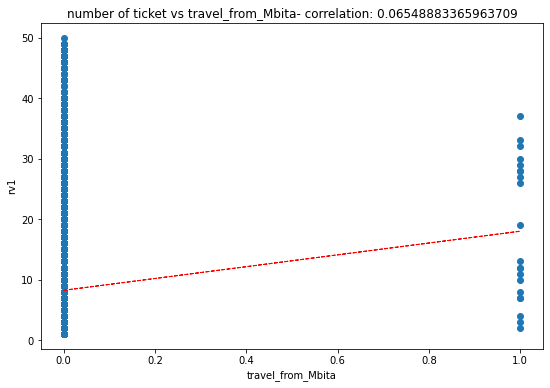

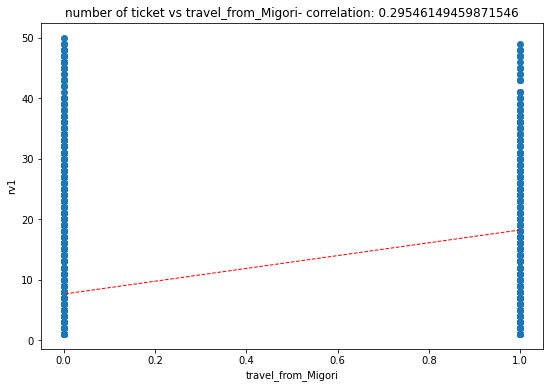

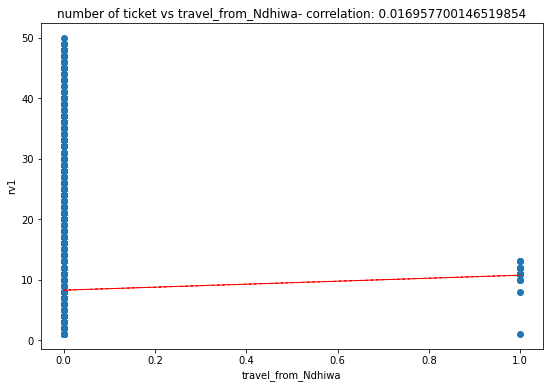

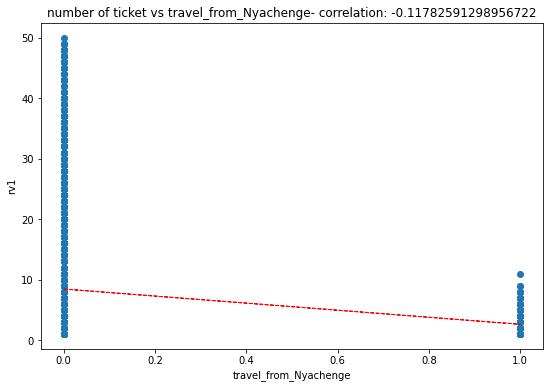

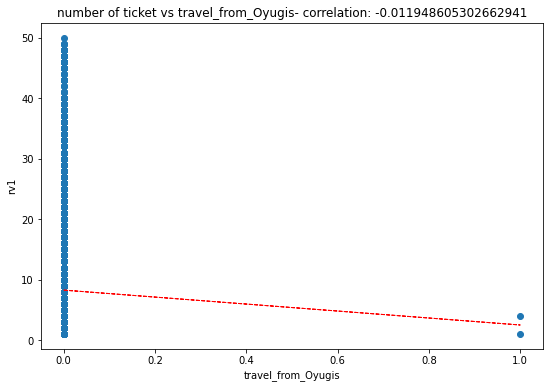

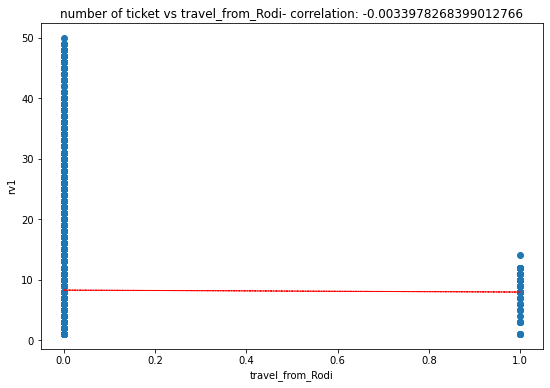

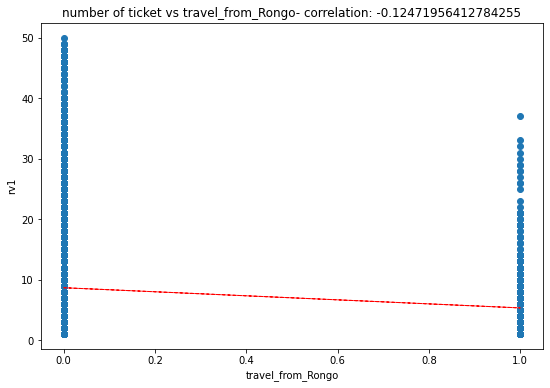

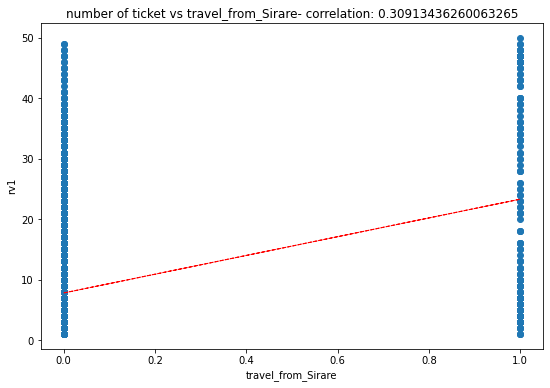

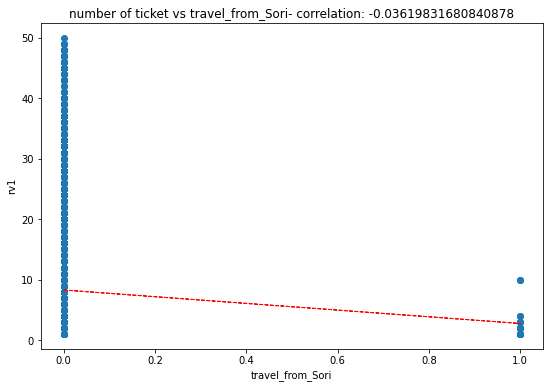

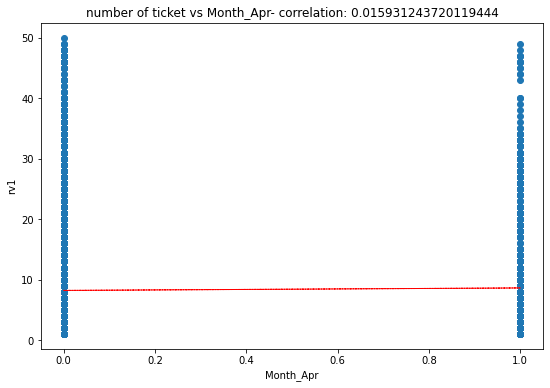

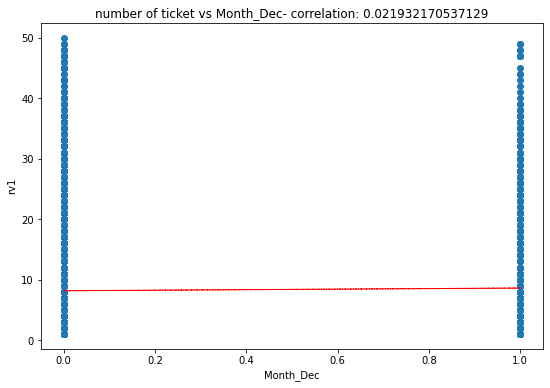

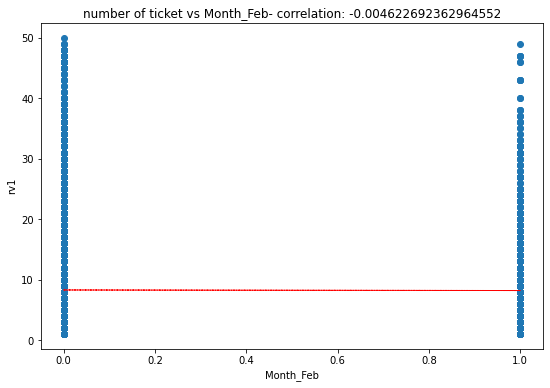

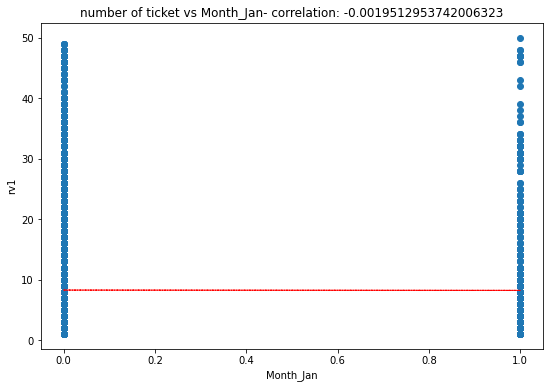

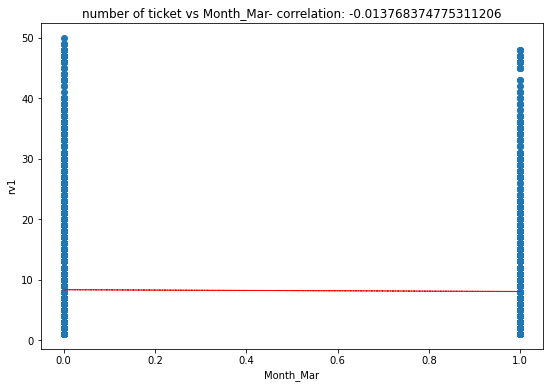

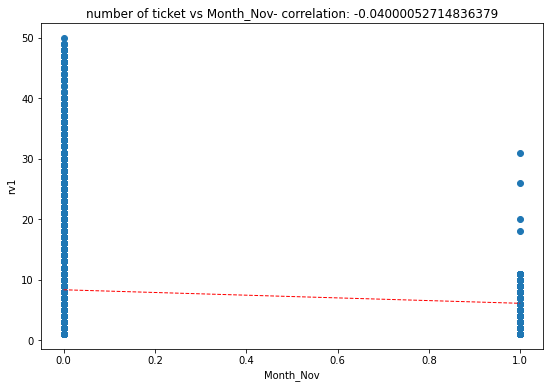

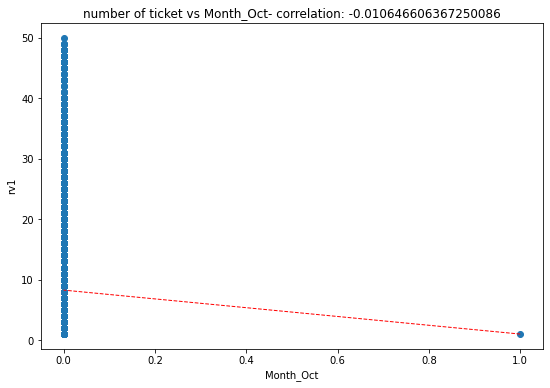

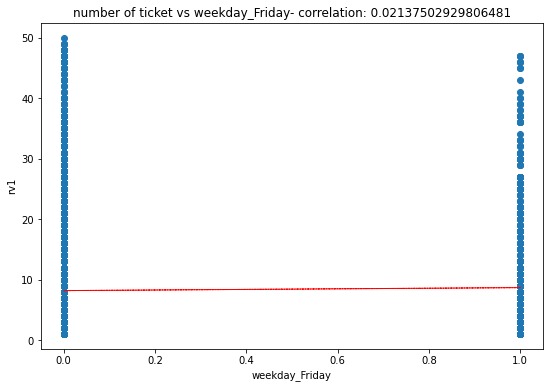

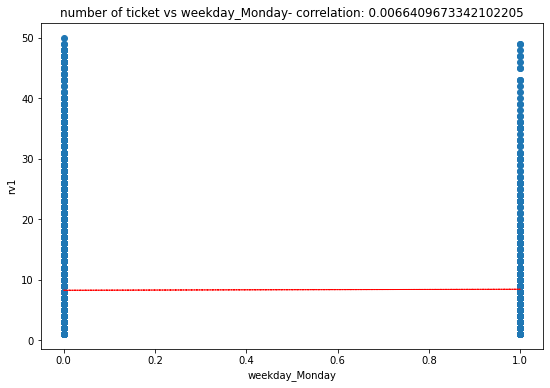

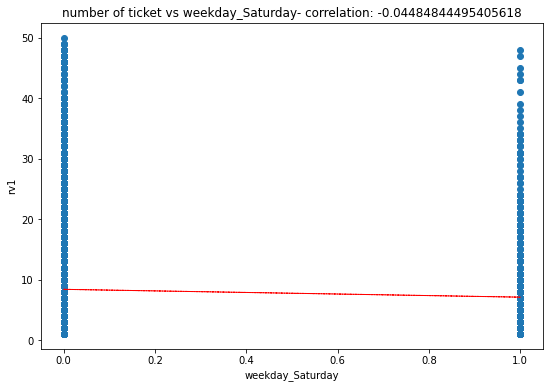

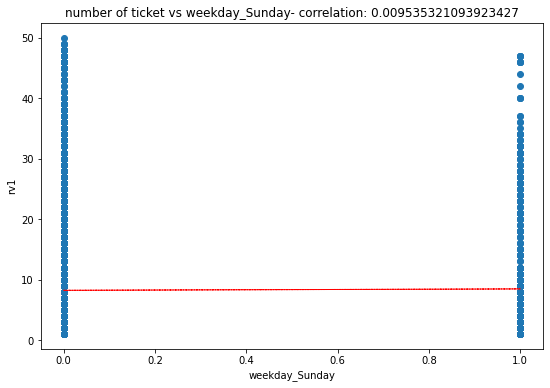

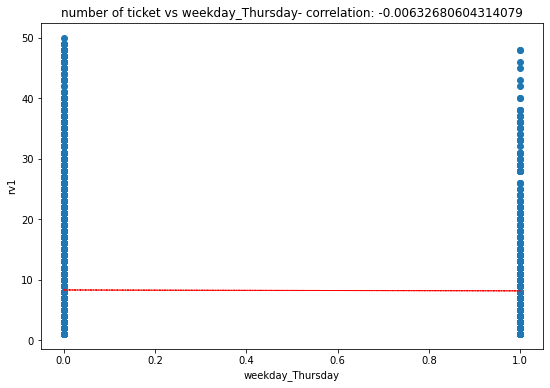

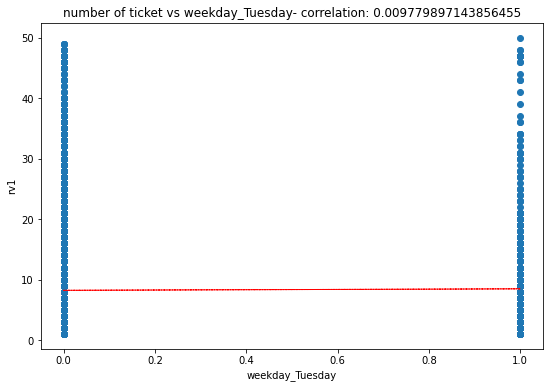

In [821]:
corr={}
for col in numeric_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['number_of_ticket']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rv1')
    ax.set_title('number of ticket vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['number_of_ticket'], 1)
    y_hat = np.poly1d(z)(df[col])
    corr[col]=correlation

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [822]:
corr.pop('number_of_ticket')
corr

{'max_capacity': 0.20876213829560264,
 'month': 0.00994128874076114,
 'day': -0.024973259766844627,
 'travel_from_distance': 0.4767382654200988,
 'travel_from_time': 0.47157003158361877,
 'Speed': 0.37857881183751585,
 'travel_from_Awendo': 0.028334476656910447,
 'travel_from_Homa Bay': 0.268879183594858,
 'travel_from_Kehancha': 0.05523855994355021,
 'travel_from_Kendu Bay': -0.010646606367250176,
 'travel_from_Keroka': -0.13538044963181775,
 'travel_from_Keumbu': -0.04702921370741511,
 'travel_from_Kijauri': -0.23206701720478662,
 'travel_from_Kisii': -0.08724652536160182,
 'travel_from_Mbita': 0.06548883365963709,
 'travel_from_Migori': 0.29546149459871546,
 'travel_from_Ndhiwa': 0.016957700146519854,
 'travel_from_Nyachenge': -0.11782591298956722,
 'travel_from_Oyugis': -0.011948605302662941,
 'travel_from_Rodi': -0.0033978268399012766,
 'travel_from_Rongo': -0.12471956412784255,
 'travel_from_Sirare': 0.30913436260063265,
 'travel_from_Sori': -0.03619831680840878,
 'Month_Apr': 0.

<BarContainer object of 36 artists>

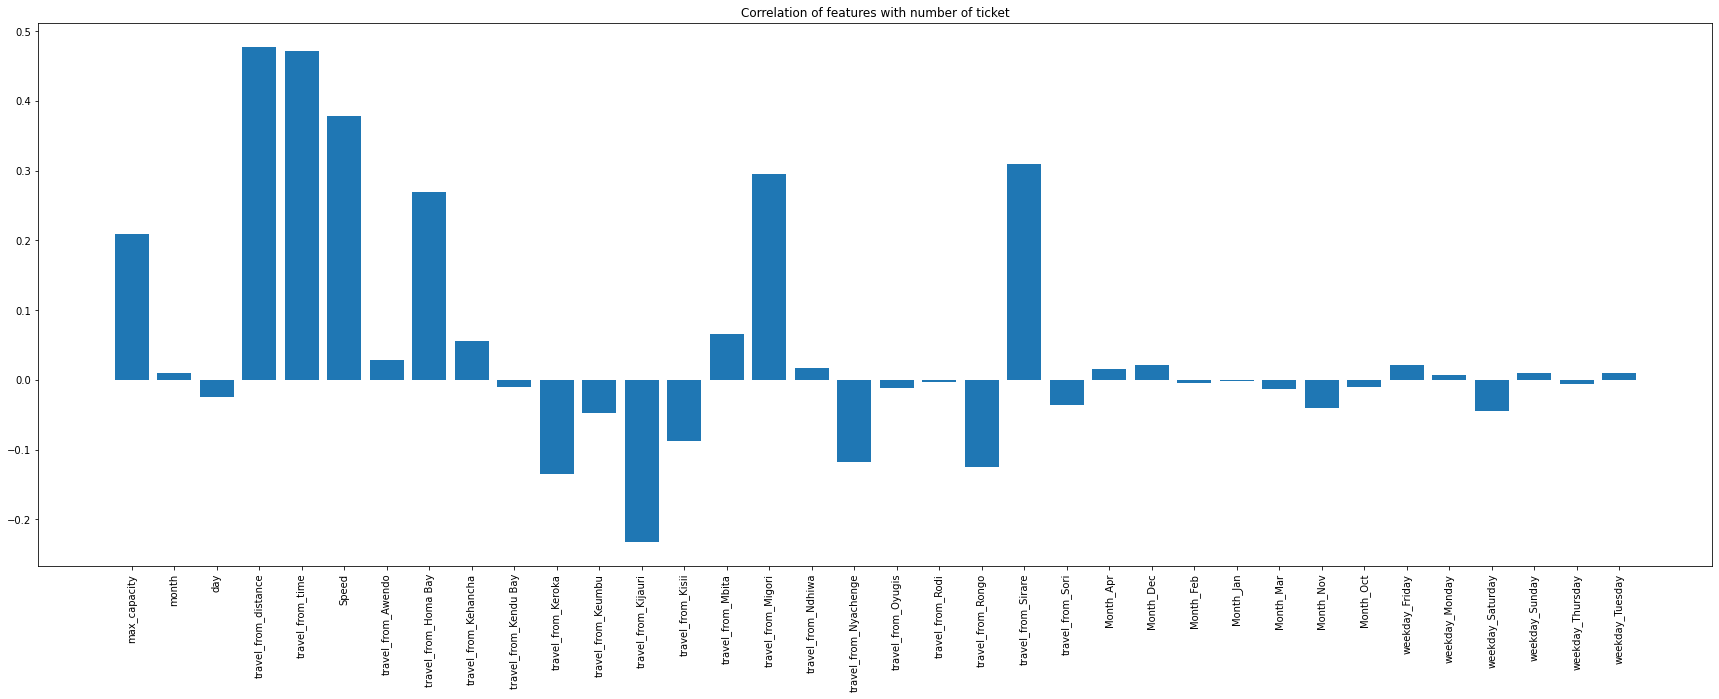

In [823]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.title('Correlation of features with number of ticket')
plt.bar(corr.keys(),corr.values())

In [824]:
features=list(corr.keys())

In [825]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = (df[features]).apply(zscore)

In [826]:
Y=(df['number_of_ticket'])

In [827]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,Y , test_size = 0.3, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(4374, 36)
(1875, 36)


# Regression

In [828]:
dict_MSE={}
dict_RMSE={}
dict_R2={}
dict_Adjusted_R2={}

In [829]:

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [830]:
#train_scores= cross_val_score(reg,X_train,y_train, cv=10)

In [831]:
#train_scores

In [832]:
#train_scores.mean()

In [833]:
reg.score(X_train, y_train)

0.3539938140471741

In [834]:
reg.score(X_test, y_test)

0.3821582881208375

In [835]:
reg.coef_

array([ 3.59288847e-01,  1.23381757e+12, -3.26348360e-01,  7.21563778e+13,
        3.16664579e+13, -1.63151952e+14,  8.45775334e+12,  4.42755088e+13,
       -3.09397007e+13, -3.62312594e+12, -1.27580314e+13, -1.94969776e+12,
       -1.09319799e+13, -6.61700226e+12, -1.45708206e+13,  2.63311509e+13,
       -1.21294820e+12,  2.29466179e+13, -4.94542190e+12,  1.25096606e+13,
        5.76172280e+13, -5.39174847e+11, -7.20749908e+12, -3.32700890e+13,
       -4.32933280e+13, -4.22435514e+13, -3.54139833e+13, -4.08280538e+13,
       -1.56783885e+13, -1.27956057e+12,  6.86816402e-02,  3.82639038e-02,
       -2.94895645e-01,  6.94656372e-02, -7.66716003e-02,  1.17176294e-01])

In [836]:
len(reg.coef_)

36

In [837]:
reg.intercept_

9.11337131919566

In [919]:
y_pred_train=reg.predict(X_train)

In [838]:
y_pred = reg.predict(X_test)

In [839]:
y_pred

array([11.02393454,  1.12701986,  2.74726266, ...,  6.27930563,
       17.47071188,  7.71232949])

In [920]:
MSE  = mean_squared_error(10**(y_train), 10**(y_pred_train))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 4.997622042082232e+42
RMSE : 2.2355361867082878e+21
R2 : 0.3539938140471741
Adjusted R2 : 0.348631530742055


In [840]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 7.334979173019564e+42
RMSE : 2.708316667788234e+21
R2 : 0.3821582881208375
Adjusted R2 : 0.3700569270611803


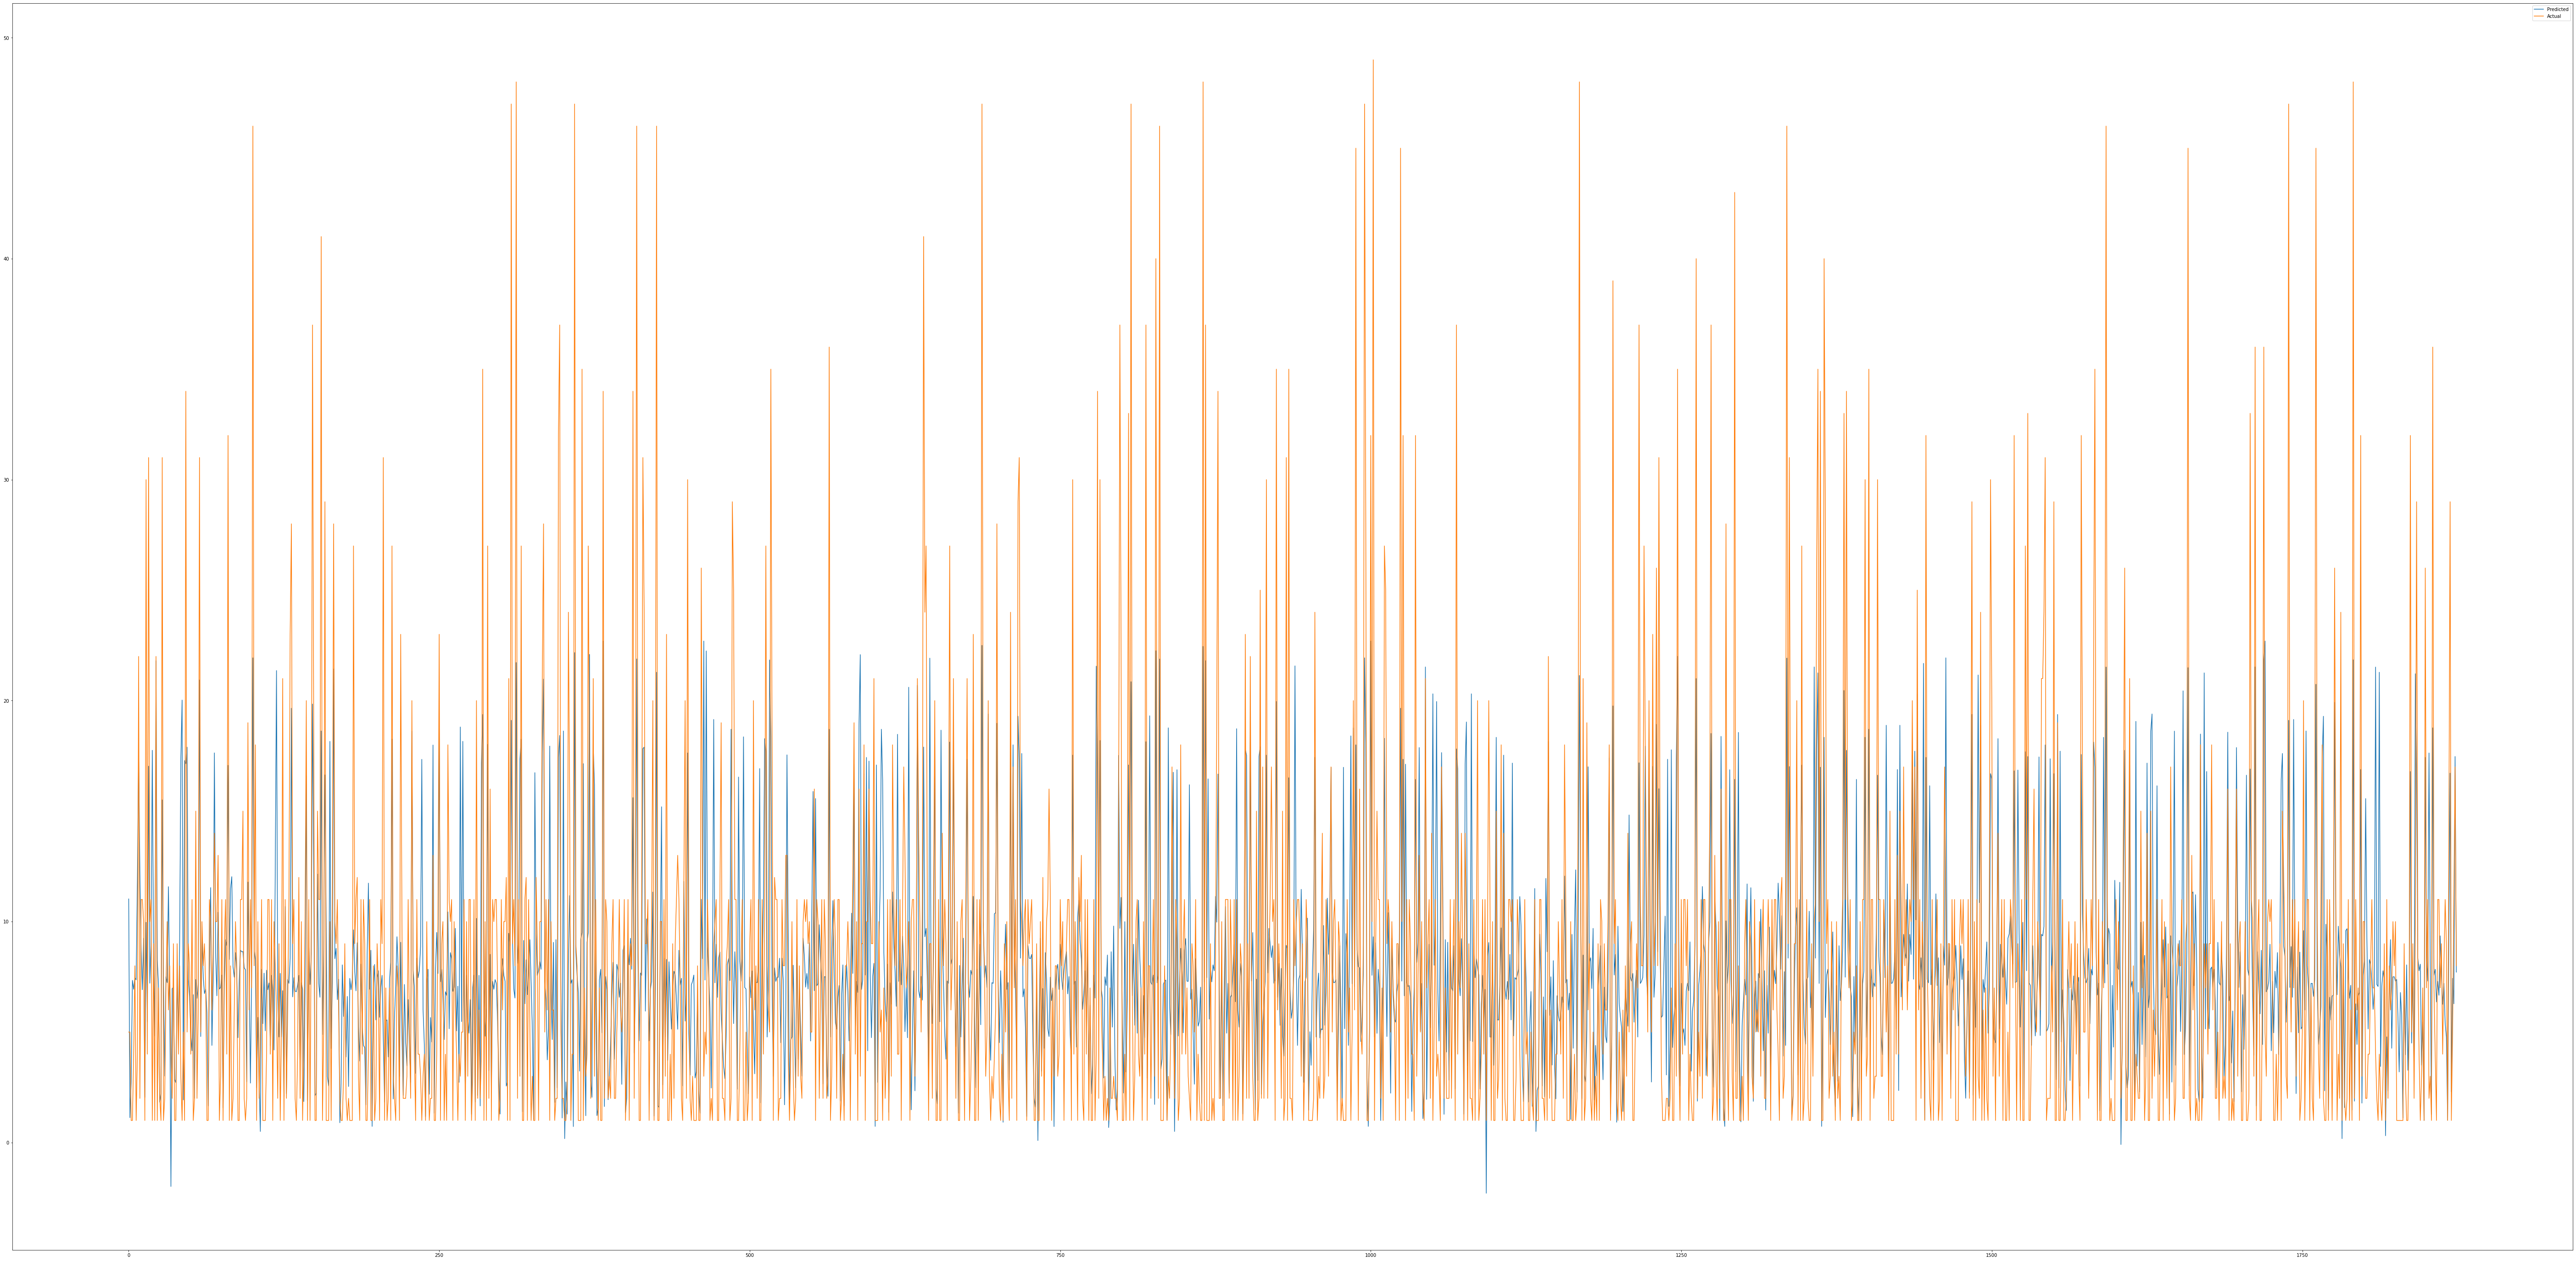

In [843]:
plt.figure(figsize=(100,50))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [844]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 500)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=500)

In [845]:
lasso.score(X_train, y_train)

0.3509406269159131

In [846]:
lasso.score(X_test,y_test)

0.37620827718200944

In [847]:
lasso.coef_

array([ 3.30275596e-02,  0.00000000e+00, -2.41969524e-01,  2.89365452e+00,
        8.87448522e-02,  0.00000000e+00,  0.00000000e+00,  1.44944871e+00,
       -5.70920595e-02, -3.04859540e-02, -0.00000000e+00, -1.27868151e-01,
       -5.03202964e-02,  8.43741370e-01,  1.94929586e-01,  1.51493308e+00,
       -0.00000000e+00, -7.09836834e-01, -9.46198891e-03, -0.00000000e+00,
       -7.31627270e-01,  1.40397199e+00, -4.88032330e-01, -4.63163974e-02,
        5.58125302e-01,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -1.60401196e-01, -1.41049144e-01,  0.00000000e+00, -0.00000000e+00,
       -2.58720606e-01,  6.50588672e-03, -1.80474512e-02,  1.62918022e-03])

In [848]:
### Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error')
lasso_regressor.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [849]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -48.70247519022821


In [921]:
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_train_lasso= lasso_regressor.predict(X_train)

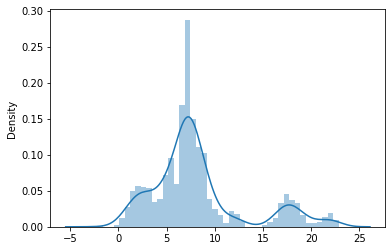

In [851]:
sns.distplot(y_pred_lasso)

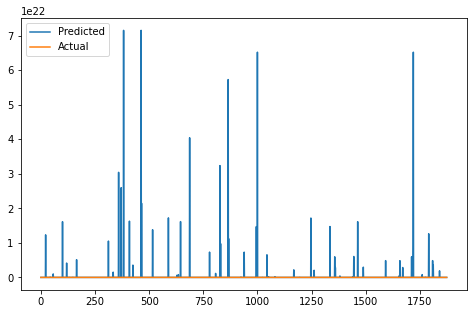

In [852]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [922]:
MSE  = mean_squared_error(10**(y_train), 10**(y_pred_train_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_lasso))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.5081794263738455e+43
RMSE : 3.8835285841279005e+21
R2 : 0.35447697490867625
Adjusted R2 : 0.3491187021617803


In [853]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.609432571537309e+43
RMSE : 4.0117733878389853e+21
R2 : 0.38166977161936055
Adjusted R2 : 0.369558842227792


In [854]:
r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : -3646314.5354273133
Adjusted R2 :  -3717733.120452005


In [855]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [856]:
R_trainscore=ridge_regressor.score(X_train, y_train)                

In [857]:
R_trainscore

-47.82607862277631

In [858]:
R_testscore=ridge_regressor.score(X_test,y_test)       

In [859]:
R_testscore

-46.753487057436374

In [860]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -48.59398092594849


In [923]:
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_train_ridge = ridge_regressor.predict(X_train)

In [924]:
MSE  = mean_squared_error(10**(y_train), 10**(y_pred_train_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_ridge))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 9.6704700628959e+42
RMSE : 3.1097379411931e+21
R2 : 0.35445628718685784
Adjusted R2 : 0.3490978427180377


In [908]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.0899460177382697e+43
RMSE : 3.3014330490535013e+21
R2 : 0.3807663920081339
Adjusted R2 : 0.3686377685654205


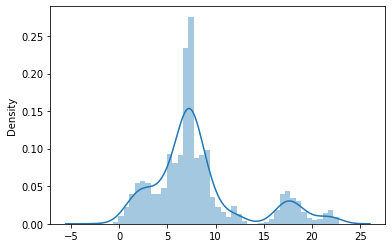

In [863]:
sns.distplot(y_pred_ridge)

In [864]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [865]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [866]:
elasticnet.score(X_train, y_train)

0.3526428396090189

In [925]:
y_pred_en = elasticnet.predict(X_test)
y_pred_train_en = elasticnet.predict(X_train)

In [926]:
MSE  = mean_squared_error(10**(y_train), 10**(y_pred_train_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred_train_en))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_pred_train_en)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 5.9646243226911585e+41
RMSE : 7.723098032973011e+20
R2 : 0.3526428396090189
Adjusted R2 : 0.3472693423127138


In [909]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 5.095564796566533e+41
RMSE : 7.138322489609539e+20
R2 : 0.3767790302480538
Adjusted R2 : 0.3645723083160244


In [869]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [870]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.7}

Using  {'alpha': 0.01, 'l1_ratio': 0.7}  the negative mean squared error is:  -48.69504706213168


In [929]:
y_pred_elastic = elastic_regressor.predict(X_test)
y_pred__train_elastic = elastic_regressor.predict(X_train)

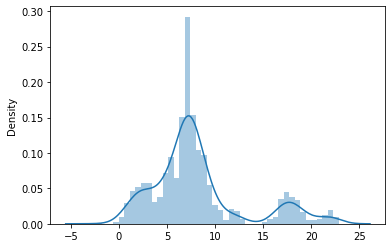

In [872]:
sns.distplot(y_pred_elastic)

In [930]:
MSE  = mean_squared_error(10**(y_train), 10**(y_pred__train_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_pred__train_elastic))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_pred__train_elastic)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.5033719412454693e+43
RMSE : 3.877334059950818e+21
R2 : 0.35449216370711667
Adjusted R2 : 0.349134017037404


In [910]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.6348203180216722e+43
RMSE : 4.0432911322605405e+21
R2 : 0.38155549460225735
Adjusted R2 : 0.369442326923085


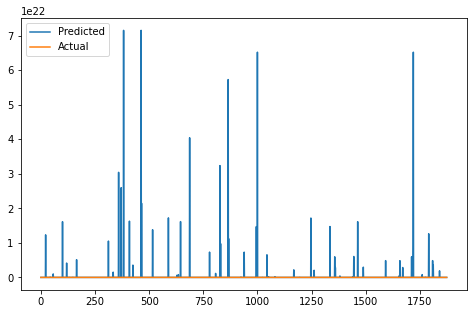

In [874]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Gradient Boosting Regression

In [875]:

# Importing the GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

In [876]:
# Training the simple gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state= 30)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=30)

In [877]:

# Predicting the values for tarining data
y_train_gb_reg = gb_reg.predict(X_train)


In [878]:
# Sample of predicted values of training data
y_train_gb_reg[:10]

array([ 6.94994334, 19.05806544,  7.41135443,  7.02004909,  5.42723471,
        7.82879156,  4.48599005,  7.82879156,  2.12307015,  7.04245456])

In [879]:
# Actual values of training data
y_train[:10]

3194    10
5052    16
2301    11
1293     8
3490     1
3640    11
639     11
3501     8
4017     1
893      6
Name: number_of_ticket, dtype: int64

In [931]:

# Predicting the values for test data
y_test_gb_reg = gb_reg.predict(X_test)
y_train_gb_reg = gb_reg.predict(X_train)

In [881]:

# Sample of predicted values of test data
y_test_gb_reg[:10]

array([ 8.09943312,  2.74149252,  2.68199055,  3.86938728,  7.30662775,
        7.82158732,  7.62143116, 10.7766012 , 16.96767969, 12.46232686])

In [882]:

# Actual values of test data
y_test[:10]

2600     5
5997     5
3147     1
144      1
1525     4
2006     8
1095     1
1875     4
2434    22
502      2
Name: number_of_ticket, dtype: int64

In [883]:

print("Train data Reg Score :",gb_reg.score(X_train,y_train))
print("Test data Reg Score :",gb_reg.score(X_test,y_test))

Train data Reg Score : 0.4079736716225908
Test data Reg Score : 0.4167897051623195


In [932]:
MSE  = mean_squared_error(10**(y_train), 10**(y_train_gb_reg))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_train_gb_reg))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_train_gb_reg)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 3.3630312946194047e+55
RMSE : 5.799164849027319e+27
R2 : 0.4079736716225908
Adjusted R2 : 0.40305945722978775


In [911]:
MSE  = mean_squared_error(10**(y_test), 10**(y_test_gb_reg))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_gb_reg))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_test_gb_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 2.1078561698947992e+54
RMSE : 1.4518457803412866e+27
R2 : 0.4167897051623195
Adjusted R2 : 0.40536665259749005


# XG Boost

In [885]:

# Importing Extreme Gradient Boosting
import xgboost as xgb

In [886]:
#Training basic XGBoost model
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [887]:
# Predicting the values for training data
y_train_xgb_reg = xgb_reg.predict(X_train)

In [888]:

# Sample of predicted values for tarining data
y_train_xgb_reg[:10]

array([ 7.444293 , 18.953964 ,  7.532003 ,  7.2777643,  5.0773234,
        7.9516854,  4.45996  ,  7.791905 ,  1.8693812,  6.986629 ],
      dtype=float32)

In [889]:

# Actual values of training data
y_train[:10]

3194    10
5052    16
2301    11
1293     8
3490     1
3640    11
639     11
3501     8
4017     1
893      6
Name: number_of_ticket, dtype: int64

In [890]:
# Predicting the values for test data
y_test_xgb_reg = xgb_reg.predict(X_test)

In [891]:
# Sample of predicted values for test data
y_test_xgb_reg[:10]

array([ 8.950681 ,  2.801513 ,  2.5083804,  3.7679834,  7.412292 ,
        7.8591843,  7.887545 , 11.286173 , 17.154058 , 12.817706 ],
      dtype=float32)

In [892]:
# Actual values of test data
y_test[:10]

2600     5
5997     5
3147     1
144      1
1525     4
2006     8
1095     1
1875     4
2434    22
502      2
Name: number_of_ticket, dtype: int64

In [893]:
print("Train data Reg Score :",xgb_reg.score(X_train,y_train))
print("Test data Reg Score :",xgb_reg.score(X_test,y_test))

Train data Reg Score : 0.4057812356130056
Test data Reg Score : 0.4179187487679461


In [894]:
# Evaluation metrics for training data
MSE_train_xgb_reg  = mean_squared_error(y_train, y_train_xgb_reg)
print("MSE for Train data :" , MSE_train_xgb_reg)

RMSE_train_xgb_reg = np.sqrt(MSE_train_xgb_reg)
print("RMSE for Train data:" ,RMSE_train_xgb_reg)

#MAE_train_xgb_reg = mean_absolute_error(y_train, y_train_xgb_reg)
#print("MAE for Train data:" ,MAE_train_xgb_reg)

#MAPE_train_xgb_reg = mean_absolute_percentage_error(y_train, y_train_xgb_reg)
#print("MAPE for Train data:" ,MAPE_train_xgb_reg)

r2_score_train_xgb_reg = r2_score(y_train, y_train_xgb_reg)
print("R2 for Train data:" ,r2_score_train_xgb_reg)

#print("Adjusted R2 for Train data: " ,adjusted_r2(X_train, r2_score_train_xgb_reg))

MSE for Train data : 44.02359248587018
RMSE for Train data: 6.635027692924136
R2 for Train data: 0.4057812356130056


In [912]:
MSE  = mean_squared_error(10**(y_test), 10**(y_test_xgb_reg))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_xgb_reg))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_test_xgb_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.8181060123801807e+48
RMSE : 1.348371615089913e+24
R2 : 0.4179187487679461
Adjusted R2 : 0.40651781022368394


Decission Tree Regressor

In [896]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
dtree = DecisionTreeRegressor(random_state = 30) 
  
# fit the regressor with X and Y data
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=30)

In [897]:
print("Train data Reg Score :",dtree.score(X_train,y_train))
print("Test data Reg Score :",dtree.score(X_test,y_test))

Train data Reg Score : 0.6077156987831526
Test data Reg Score : -0.07653117262829734


In [914]:
# Predicting the values for test data
y_pred_dtree = dtree.predict(X_test)

In [915]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_dtree))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_dtree))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_pred_dtree)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.0720533334938668e+93
RMSE : 3.2742225542773766e+46
R2 : -0.07653117262829734
Adjusted R2 : -0.09761665805518449


# Random Forest

In [898]:

# Importing the RandomForest packages
from sklearn.ensemble import RandomForestRegressor

In [899]:
# Training the simple gradient Boosting model
randf_reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=30)
randf_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=10, random_state=30)

In [900]:

# Predicting the values for tarining data
y_train_rf_reg = randf_reg.predict(X_train)

In [901]:

# Sample of predicted values of training data
y_train_rf_reg[:10]

array([ 7.65928672, 18.66423927,  7.65928672,  7.65928672,  5.58339155,
        7.65928672,  2.29489459,  7.65928672,  2.29489459,  5.26884672])

In [902]:
# Actual values of test data
y_test[:10]

2600     5
5997     5
3147     1
144      1
1525     4
2006     8
1095     1
1875     4
2434    22
502      2
Name: number_of_ticket, dtype: int64

In [903]:

# Predicting the values for test data
y_test_rf_reg = randf_reg.predict(X_test)

In [904]:

# Sample of predicted values of test data
y_test_rf_reg[:10]

array([11.38146815,  4.48720312,  2.29489459,  6.88511501,  7.65928672,
        7.65928672,  7.79027891, 11.80622992, 17.34849982,  8.37118549])

In [905]:

print("Train data Reg Score :",randf_reg.score(X_train,y_train))
print("Test data Reg Score :",randf_reg.score(X_test,y_test))

Train data Reg Score : 0.36335724483266507
Test data Reg Score : 0.3832337761926312


In [917]:
MSE  = mean_squared_error(10**(y_train), 10**(y_train_rf_reg))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_train), (y_train_rf_reg))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_train), (y_train_rf_reg)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.2775707698062007e+52
RMSE : 1.130296761831246e+26
R2 : 0.36335724483266507
Adjusted R2 : 0.3580726842640637


In [916]:
MSE  = mean_squared_error(10**(y_test), 10**(y_test_rf_reg))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_test_rf_reg))
print("R2 :" ,r2)

Adjusted_R2=1-(1-r2_score((y_test), (y_test_rf_reg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 :" ,Adjusted_R2)

MSE : 1.1875645867316142e+51
RMSE : 3.4461058990280816e+25
R2 : 0.3832337761926312
Adjusted R2 : 0.3711534801876991
